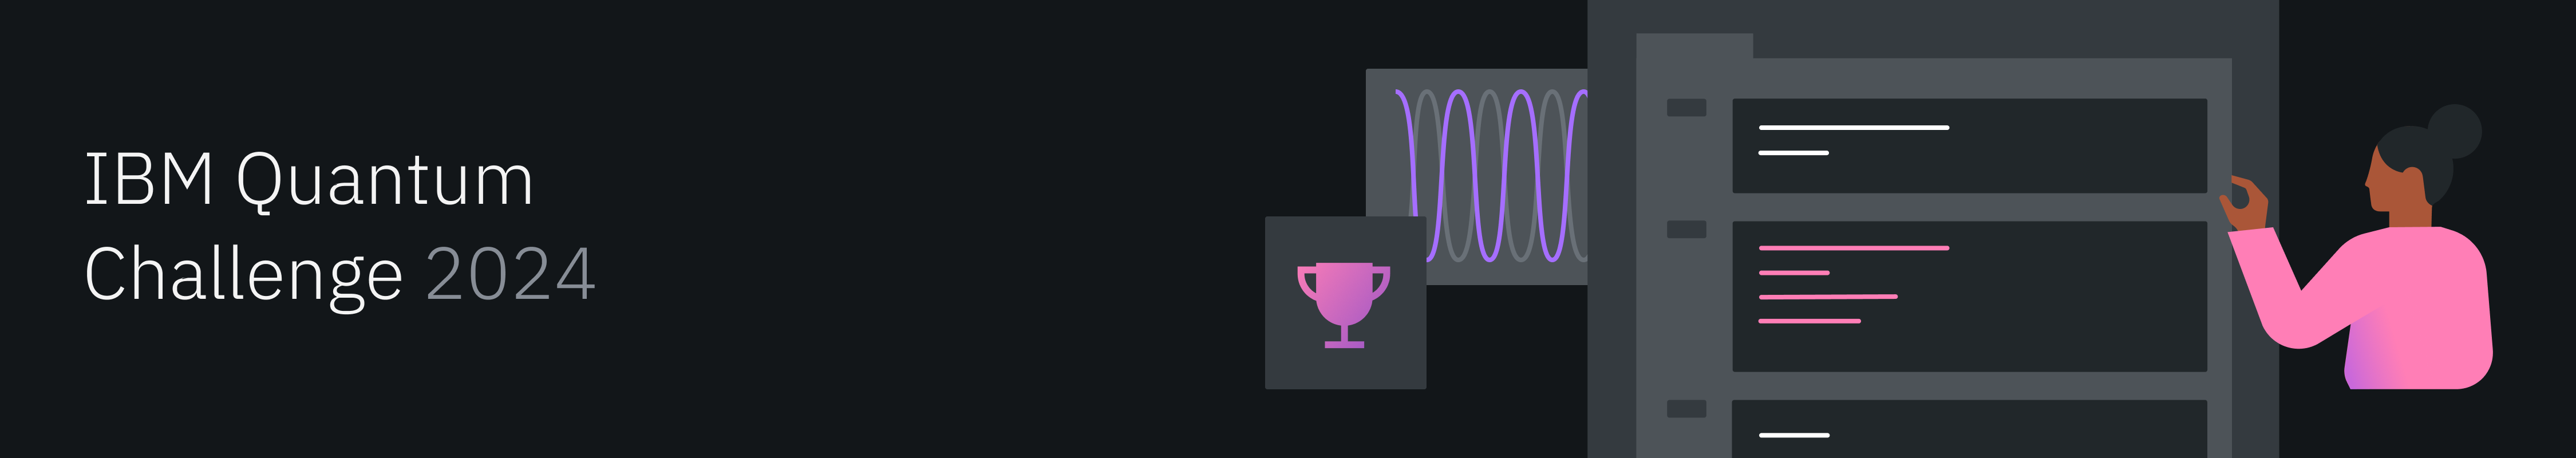

# Classroom Sharing Demo for Lab 2: The Transpiler



In [ ]:
### Install Qiskit and relevant packages, if needed

%pip install qiskit[visualization]==1.0.2
%pip install qiskit_ibm_runtime
%pip install qiskit_aer
%pip install qiskit-transpiler-service
%pip install graphviz
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

In [ ]:
### Save API Token, if needed

%set_env QXToken=addYourAPI

# Make sure there is no space between the equal sign
# and the beginning of your token

In [2]:
# Imports

from qiskit.circuit.random import random_circuit
from qiskit.circuit.library import XGate, YGate
from qiskit_ibm_runtime.fake_provider import FakeTorino, FakeOsaka
from qiskit.transpiler import InstructionProperties, PassManager
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler.preset_passmanagers.plugin import list_stage_plugins
from qiskit.transpiler.timing_constraints import TimingConstraints
from qiskit.transpiler.passes.scheduling import ASAPScheduleAnalysis,PadDynamicalDecoupling
from qiskit.visualization.timeline import draw, IQXStandard
from qiskit.transpiler import StagedPassManager
from qiskit.visualization import plot_circuit_layout
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from util import version_check

version_check()

You have the right version! Enjoy the challenge!


<div class="alert alert-block alert-success">
<a id='ex1'></a>
<a name='ex1'></a>

### Exercise 1:

**Your Task:** Please match the description of what happens in each stage with the corresponding transpilation stage name in the code cell below.

- **A.** This stage centers around reducing the number of circuit operations and the depth of circuits with several optimization options.
- **B.** This stage inserts the appropriate number of SWAP gates in order to execute the circuits using the selected layout.
- **C.** this stage is used to translate any gates that operate on more than two qubits, into gates that only operate on one or two qubits.
- **D.** This stage executes a sequence of gates, a one-to-one mapping from the "virtual" qubits to the "physical" qubits in an actual quantum device.
- **E.** this pass can be thought of as explicitly inserting hardware-aware operations like delay instructions to account for the idle time between gate executions.
- **F.** This stage translates (or unrolls) the gates specified in a circuit to the native basis gates of a specified backend.

<b>HINT: </b> The answer will always be a single capital letter with quotation marks. For example: "A"

</div>

In [4]:
ans = {}

# Place the correct letter next to the corresponding stage, inside a parenthesis
# example:  ans["test"] = "M"

ans["init"] = 'C'
ans["layout"] = 'D'
ans["routing"] = 'B'
ans["translation"] = 'F'
ans["optimization"] = 'A'
ans["scheduling"] = 'E'

# Optimization levels <a name='optimization_level'></a>

<div class="alert alert-block alert-success">
<a id='ex2'></a>
<a name='ex2'></a>

### Exercise 2: Build a function to `evaluate` transpiled circuit


Since the goal of transpiling is to improve the actual execution performance of the circuit, your goal is to create a function that measures the performance of the translated circuit. You will use this function later in this lab.

**Your Task:** Create a function called `scoring`. The function should receives the transpiled circuit, its *final layout*, and its target backend as its inputs. The function should then return a circuit score. The closer the score is to 0, the better.

Other notes:
* Please use `FakeTorino` from the `qiskit-ibm-runtime` package for this whole lab.
* The algorithm for calculating the actual score in `util.py` is from [Mapomatic](https://github.com/qiskit-community/mapomatic), and the main code has been updated to suit PrimitiveV2.
* We have constructed some of this function for you.
* You will need to get the final layout of transpiled circuit. These two pages should help you complete the code below to finish the function.
  * [The layout section from the QuantumCircuit API documentation](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#layout)
  * [The TranspileLayout section from the Qiskit Transpiler API documentation](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.TranspileLayout)
</div>

In [5]:
### Create the scoring function

def scoring( qc, backend):
    from util import transpile_scoring

    layout = qc._layout
    fidelity = transpile_scoring(qc, layout, backend)
    score = 1 - fidelity

    return score


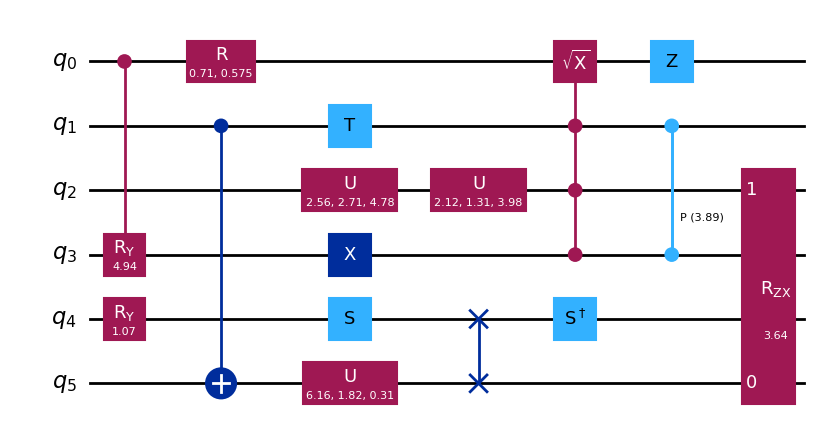

In [6]:
### Create a random circuit

## DO NOT CHANGE THE SEED NUMBER
seed = 10000

## Create circuit

num_qubits = 6
depth = 4
qc = random_circuit(num_qubits,depth,measure=False, seed=seed)

qc.draw('mpl')

In [7]:
## Save FakeTorino as backend

backend = FakeTorino()

In [8]:
circuit_depths = {
    'opt_lv_0': None,
    'opt_lv_1': None,
    'opt_lv_2': None,
    'opt_lv_3': None,
}
gate_counts = {
    'opt_lv_0': None,
    'opt_lv_1': None,
    'opt_lv_2': None,
    'opt_lv_3': None,
}

scores = {
    'opt_lv_0': None,
    'opt_lv_1': None,
    'opt_lv_2': None,
    'opt_lv_3': None,
}

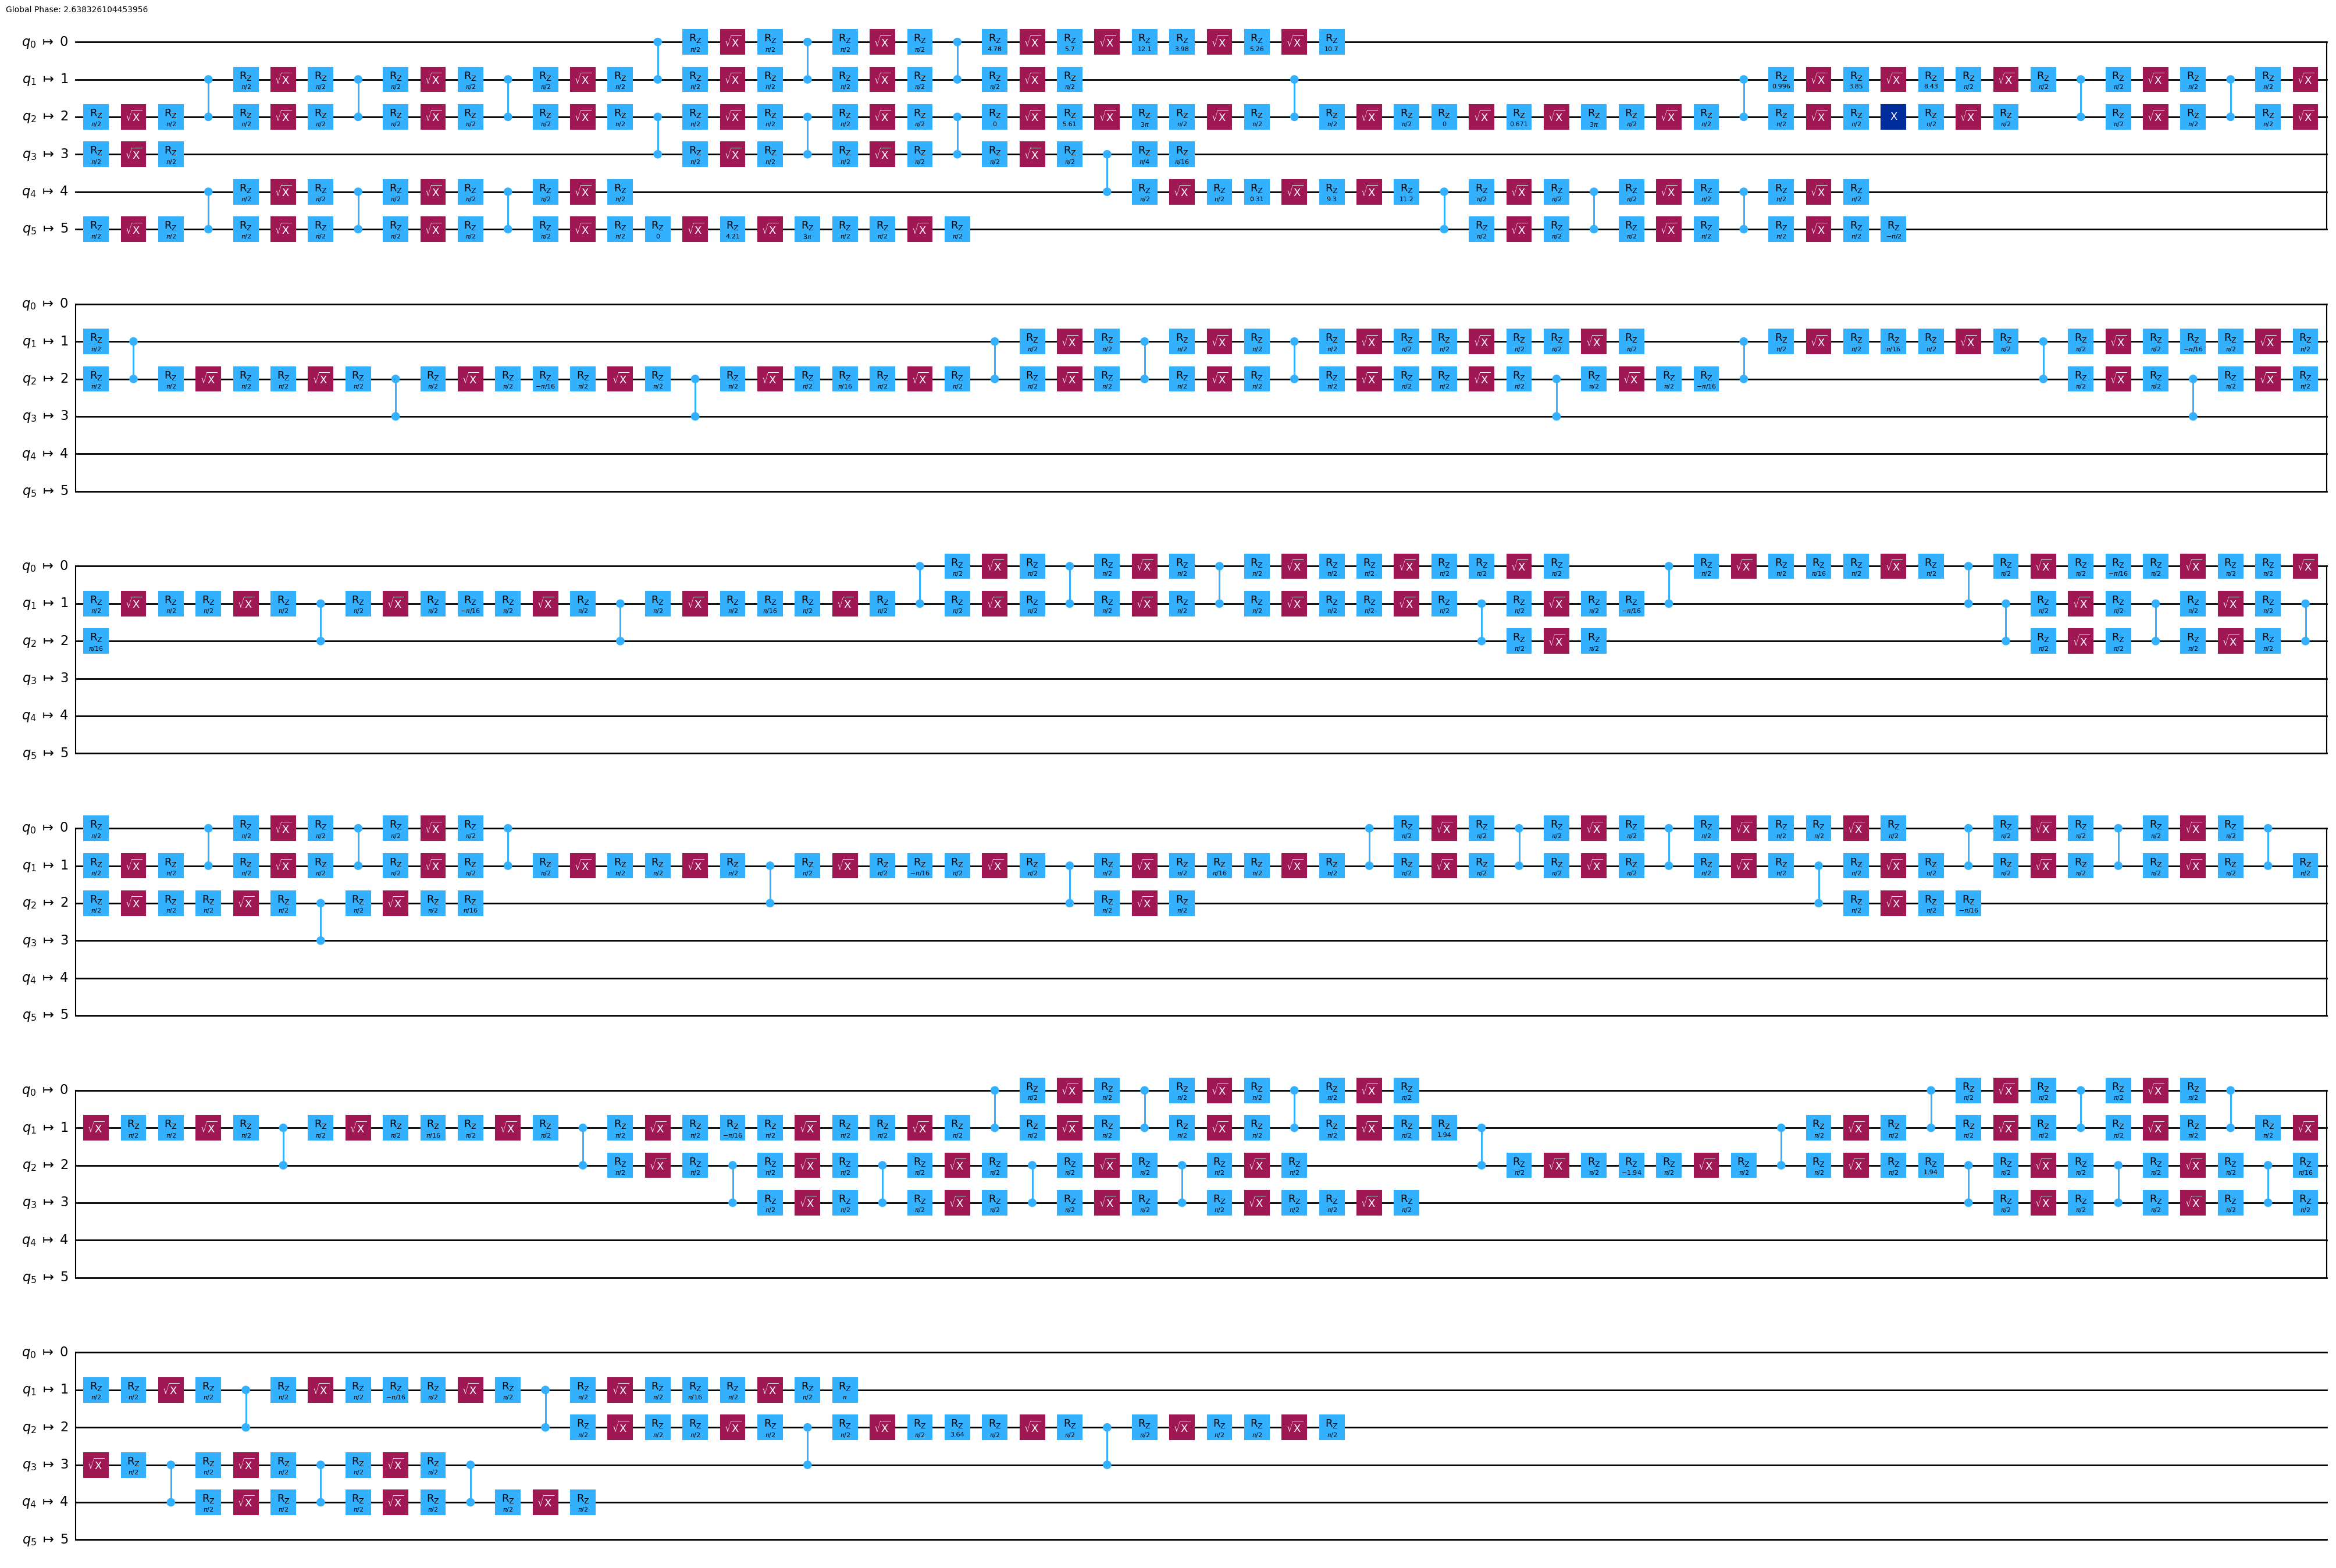

In [9]:
# Make a pass manager with our desired optimization level and backend
pm_lv0 = generate_preset_pass_manager(backend=backend, optimization_level=0, seed_transpiler=seed)

# Run for our random circuit
tr_lv0 = pm_lv0.run(qc)

# uncomment the next line to draw circuit
tr_lv0.draw('mpl', idle_wires=False, fold=60)

<div class="alert alert-block alert-success">
<a id='ex3'></a>
<a name='ex3'></a>

### Exercise 3: (Start)

**Your Task:** Find the circuit depth of the random circuit, the sum of the total gate number, and compute the performance score of this circuit using `scoring`. Use the provided code to save each of these results to our previously made array.

</div>

In [10]:
### Your code here ###

circuit_depths['opt_lv_0'] = qc.depth()
gate_counts['opt_lv_0'] = sum(qc.count_ops().values())
scores['opt_lv_0'] = scoring(qc, backend)

### Don't change code after this line ###

print("Optimization level 0 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_0'])
print("Gate count:", gate_counts['opt_lv_0'])
print("Score:", scores['opt_lv_0'])

Optimization level 0 results
Circuit depth: 4
Gate count: 16
Score: 0.00016841754103991136




## Optimization level = 1 <a name='opt_lv_1'></a>

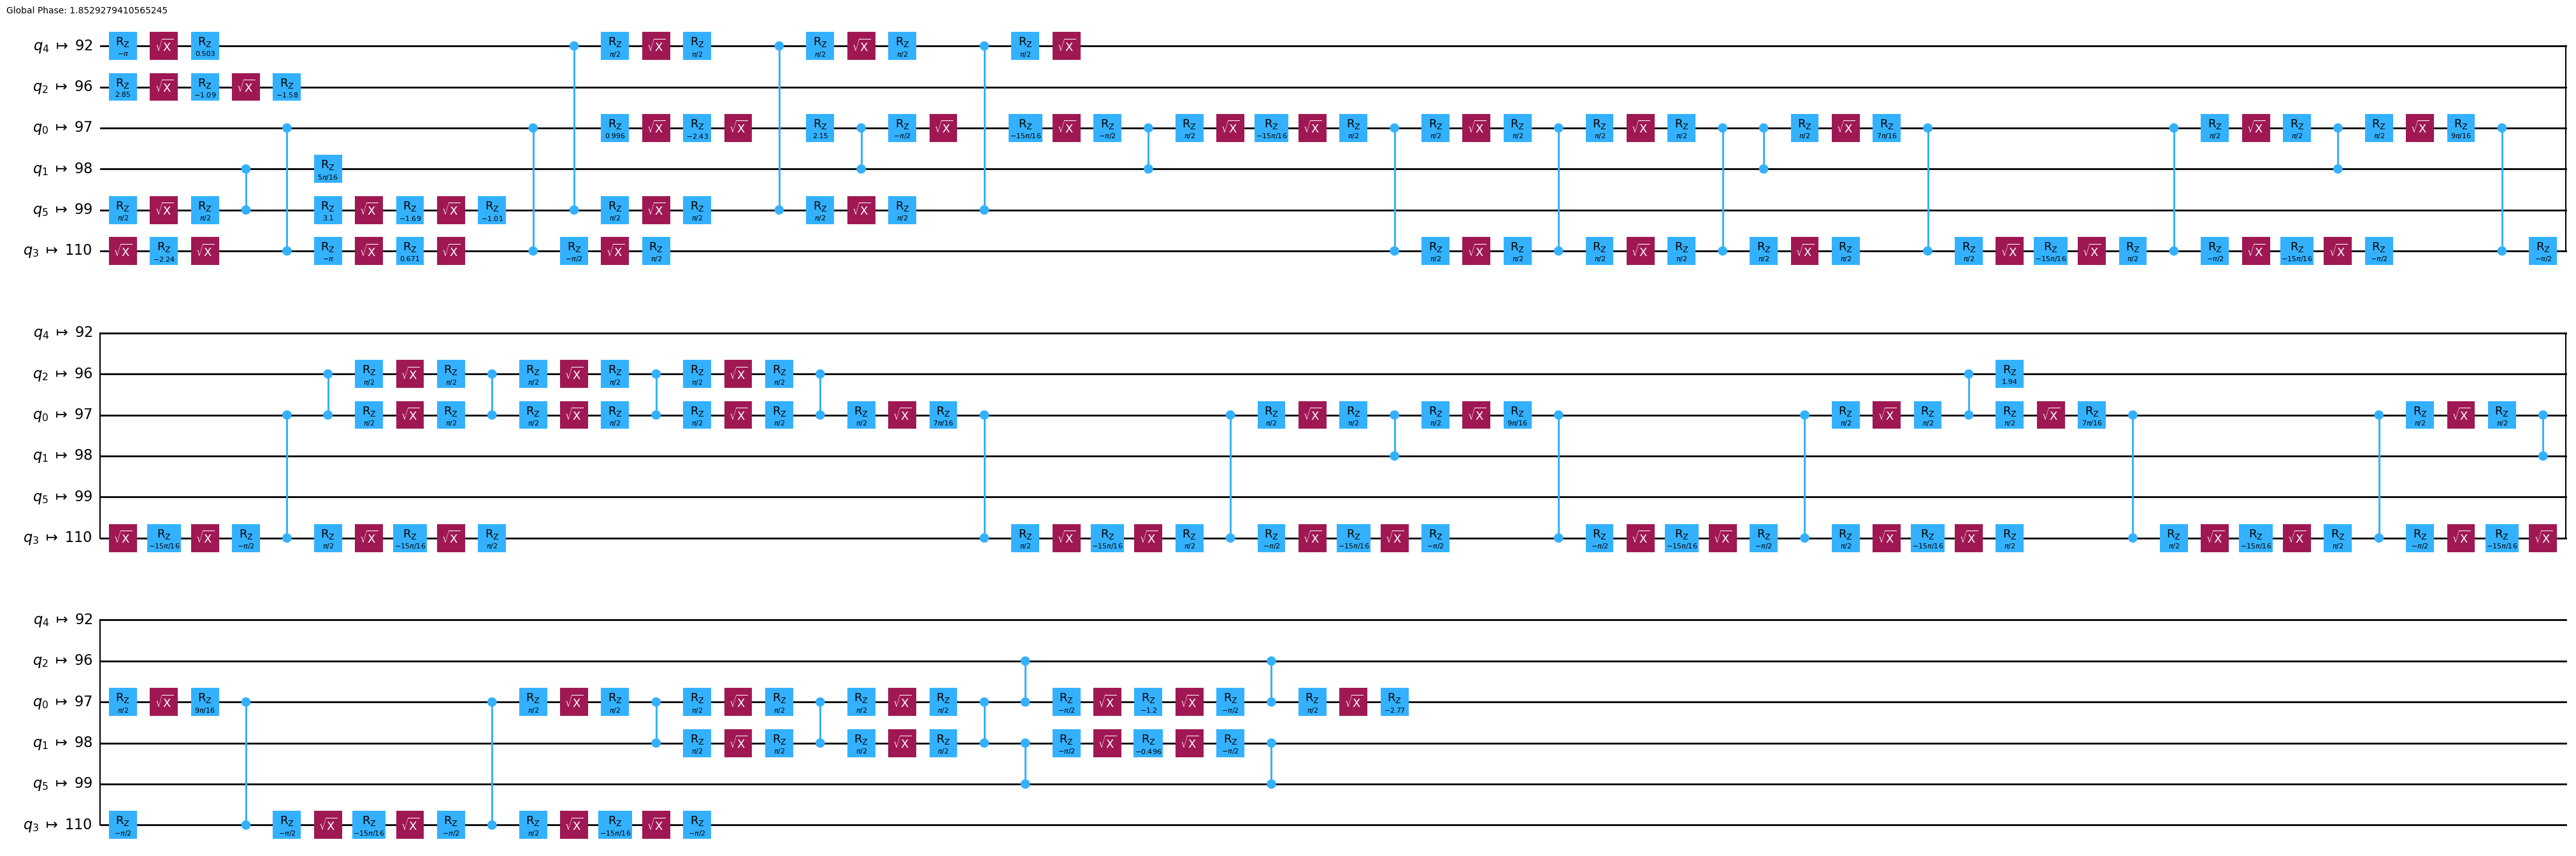

In [11]:
# Make a pass manager with our desired optimization level and backend
pm_lv1 = generate_preset_pass_manager(backend=backend,optimization_level=1, seed_transpiler=seed)

# Run for our random circuit
tr_lv1 = pm_lv1.run(qc)

# uncomment the next line to draw circuit
tr_lv1.draw('mpl', idle_wires=False, fold=60)

In [12]:
### Your code here ###

circuit_depths['opt_lv_1'] = qc.depth()
gate_counts['opt_lv_1'] = sum(qc.count_ops().values())
scores['opt_lv_1'] = scoring(qc, backend)

### Don't change code after this line ###

print("Optimization level 1 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_1'])
print("Gate count:", gate_counts['opt_lv_1'])
print("Score:", scores['opt_lv_1'])

Optimization level 1 results
Circuit depth: 4
Gate count: 16
Score: 0.00016841754103991136


## Optimization level = 2 <a name='opt_lv_2'></a>


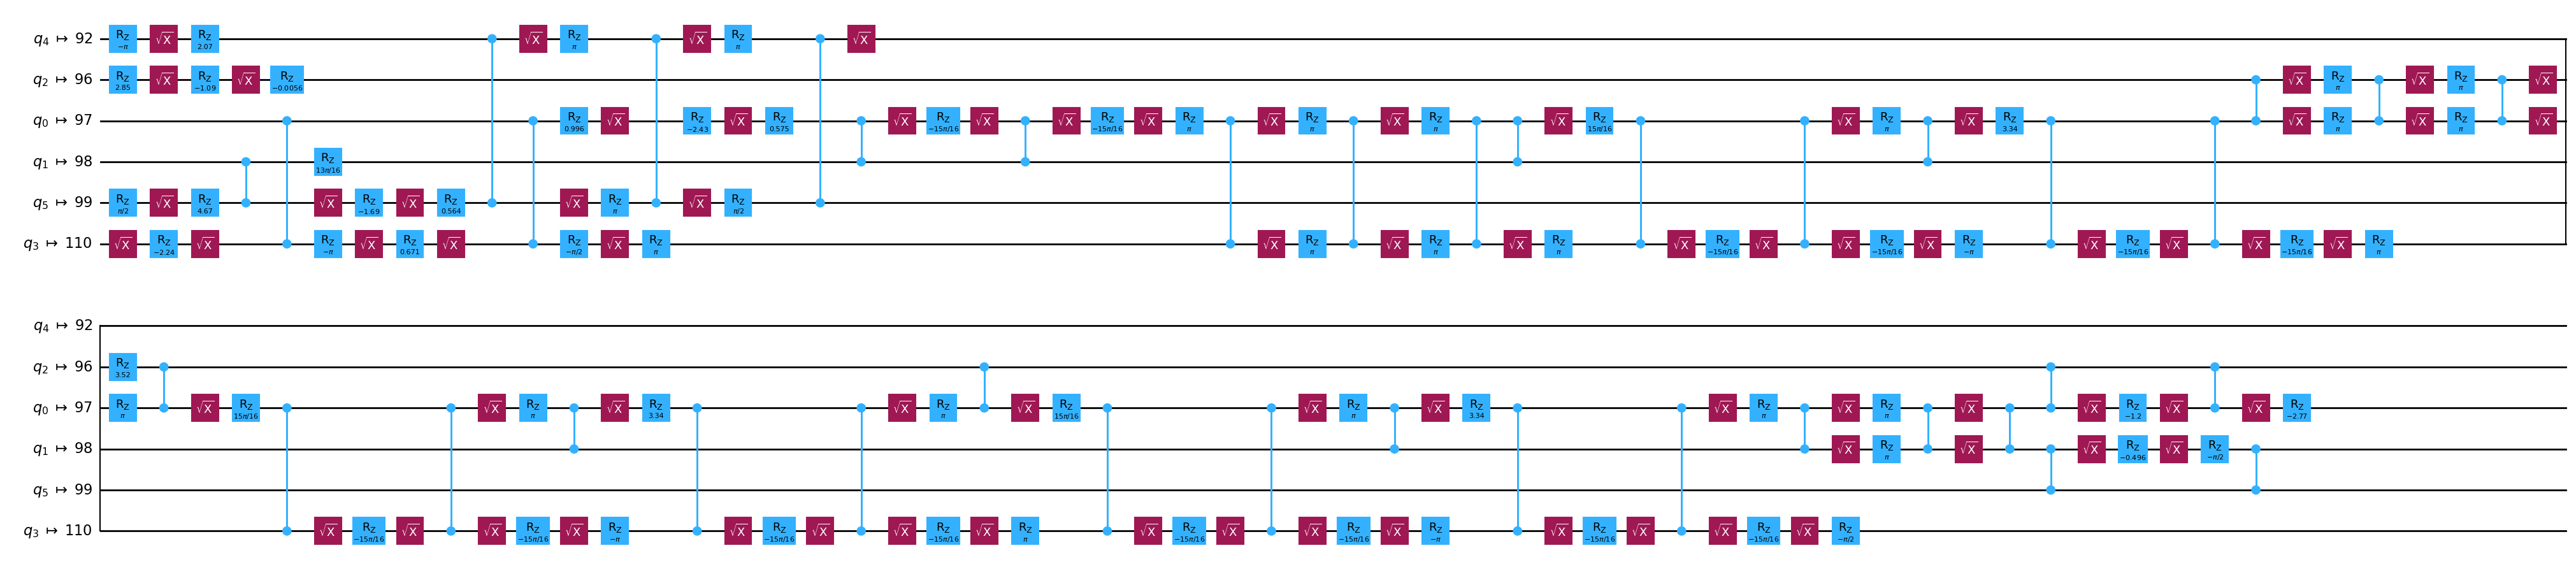

In [13]:
# Make a pass manager with our desired optimization level and backend
pm_lv2 = generate_preset_pass_manager(backend=backend,optimization_level=2, seed_transpiler=seed)

# Run for our random circuit
tr_lv2 = pm_lv2.run(qc)

# uncomment the next line to draw circuit
tr_lv2.draw('mpl', idle_wires=False, fold=60)

In [14]:
### Your code here ###

circuit_depths['opt_lv_2'] = qc.depth()
gate_counts['opt_lv_2'] = sum(qc.count_ops().values())
scores['opt_lv_2'] = scoring(qc, backend)

### Don't change code after this line ###

print("Optimization level 2 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_2'])
print("Gate count:", gate_counts['opt_lv_2'])
print("Score:", scores['opt_lv_2'])

Optimization level 2 results
Circuit depth: 4
Gate count: 16
Score: 0.00016841754103991136


## Optimization level = 3 <a name='opt_lv_3'></a>


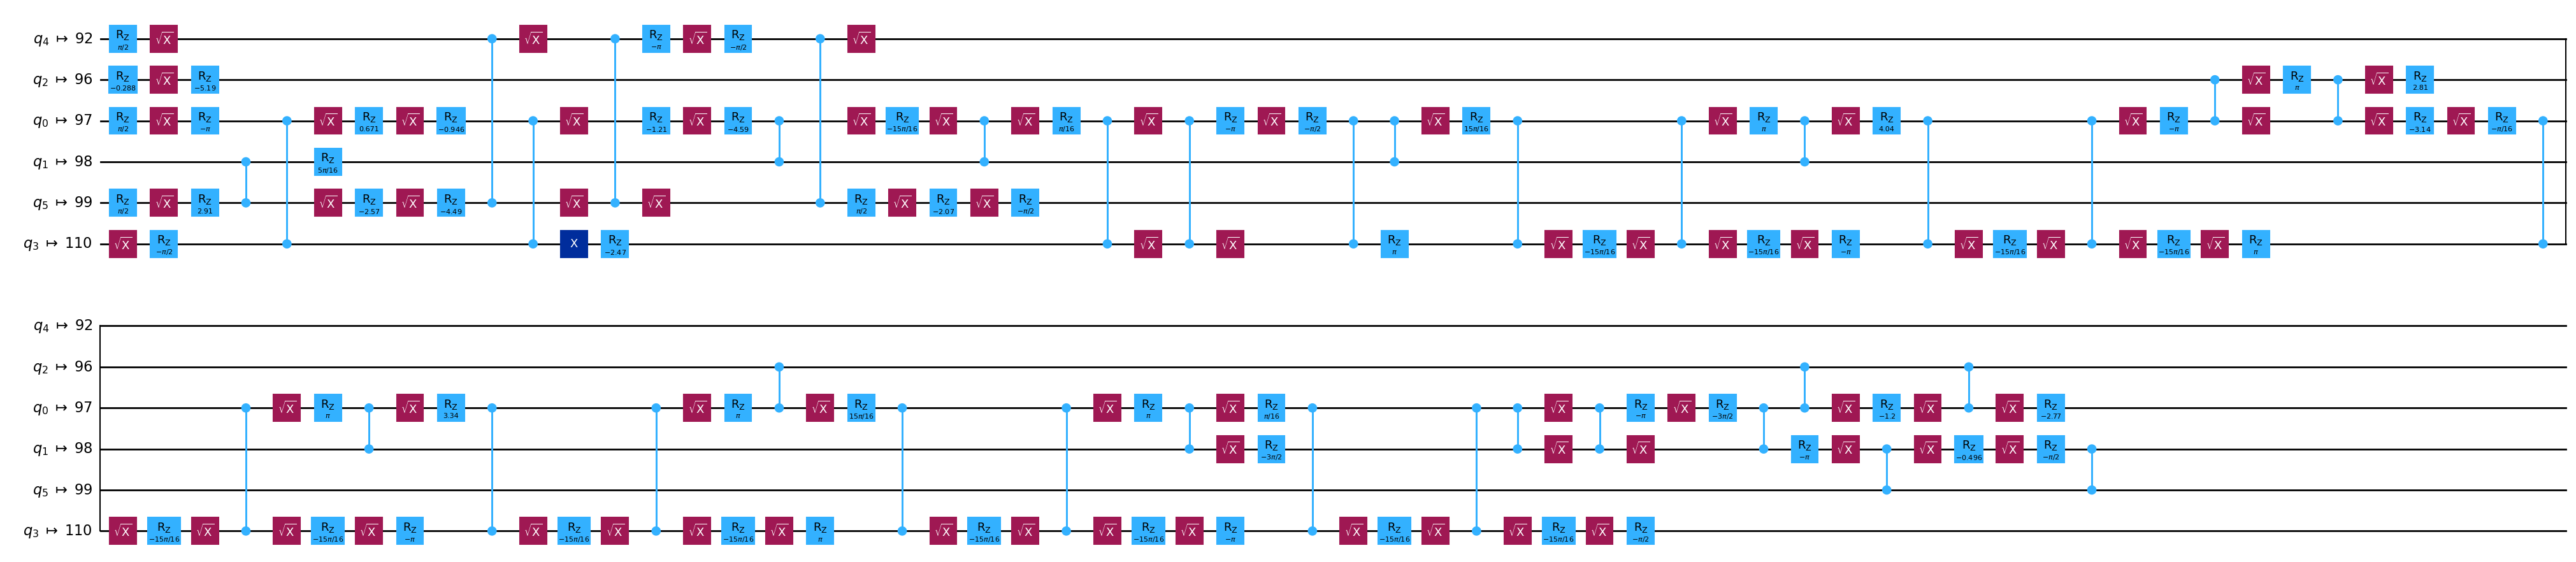

In [15]:
pm_lv3 = generate_preset_pass_manager(backend=backend,optimization_level=3, seed_transpiler=seed)

tr_lv3 = pm_lv3.run(qc)

# uncomment to draw circuit
tr_lv3.draw('mpl', idle_wires=False, fold=60)

In [16]:
### Your code here ###

circuit_depths['opt_lv_3'] = qc.depth()
gate_counts['opt_lv_3'] = sum(qc.count_ops().values())
scores['opt_lv_3'] = scoring(qc, backend)

### Don't change code after this line ###

print("Optimization level 3 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_3'])
print("Gate count:", gate_counts['opt_lv_3'])
print("Score:", scores['opt_lv_3'])

Optimization level 3 results
Circuit depth: 4
Gate count: 16
Score: 0.00016841754103991136


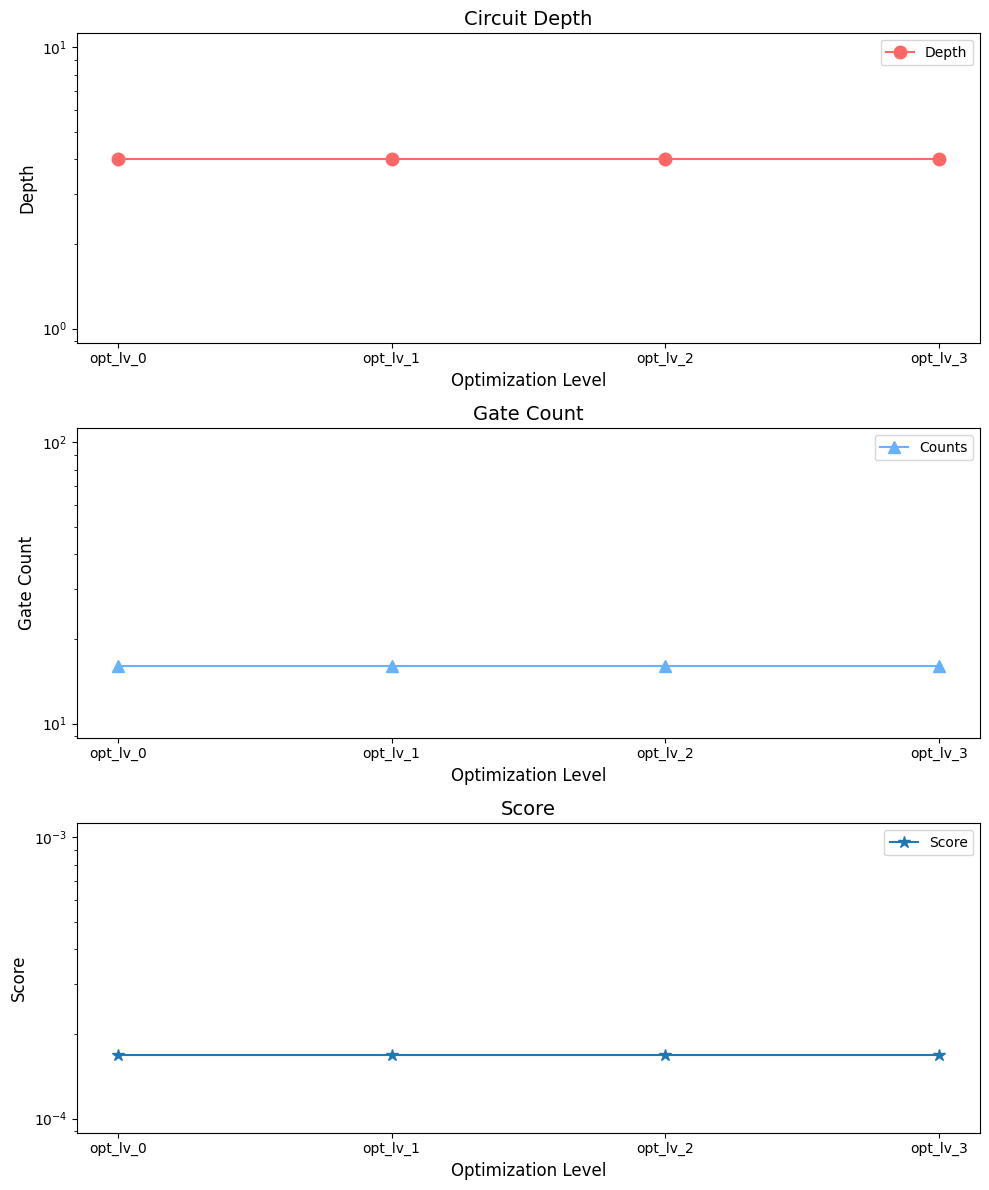

In [17]:
colors = ['#FF6666', '#66B2FF']
ax = ["opt_lv_0", "opt_lv_1", "opt_lv_2", "opt_lv_3"]
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot 1: Circuit Depth
ax1.semilogy(ax, [circuit_depths[key] for key in ax],'o-',markersize=9, color='#FF6666', label="Depth")
ax1.set_xlabel("Optimization Level", fontsize=12)
ax1.set_ylabel("Depth", fontsize=12)
ax1.set_title("Circuit Depth", fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Total Number of Gates
ax2.semilogy(ax, [gate_counts[key] for key in ax],'^-',markersize=9, color='#66B2FF', label="Counts")
ax2.set_xlabel("Optimization Level", fontsize=12)
ax2.set_ylabel("Gate Count", fontsize=12)
ax2.set_title("Gate Count", fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Score of Transpiled Circuit
ax3.semilogy(ax, [scores[key] for key in ax],'*-',markersize=9, label="Score")
ax3.set_xlabel("Optimization Level", fontsize=12)
ax3.set_ylabel("Score", fontsize=12)
ax3.set_title("Score", fontsize=14)
ax3.legend(fontsize=10)

fig.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### Exercise 3: (Finish)

**Your Task:** Above you did a great amount of work to construct your different pass managers, test them, and save information about each one to it's corresponding array. You graphed that information to visibly compare your results. Now, submit all four pass managers to the grader.

Make sure you didn't change any seed values!

</div>


In [18]:
list_stage_plugins("init")

['default']

In [19]:
print("Plugins run by default init stage")
print("=================================")

for i in range(4):
    print(f"\nOptimization level {i}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=i, init_method="default", seed_transpiler=1000)
    for task in pm.init.to_flow_controller().tasks:
        print(" -", type(task).__name__)

Plugins run by default init stage

Optimization level 0:
 - UnitarySynthesis
 - HighLevelSynthesis
 - BasisTranslator

Optimization level 1:
 - UnitarySynthesis
 - HighLevelSynthesis
 - BasisTranslator
 - InverseCancellation

Optimization level 2:
 - UnitarySynthesis
 - HighLevelSynthesis
 - BasisTranslator
 - InverseCancellation

Optimization level 3:
 - UnitarySynthesis
 - HighLevelSynthesis
 - BasisTranslator
 - OptimizeSwapBeforeMeasure
 - RemoveDiagonalGatesBeforeMeasure
 - InverseCancellation


In [20]:
list_stage_plugins("layout")

['default', 'dense', 'sabre', 'trivial']

Plugins run by default layout stage

Optimization level 0:
 -  TrivialLayout
[1, 4, 2, 0, 5, 3]


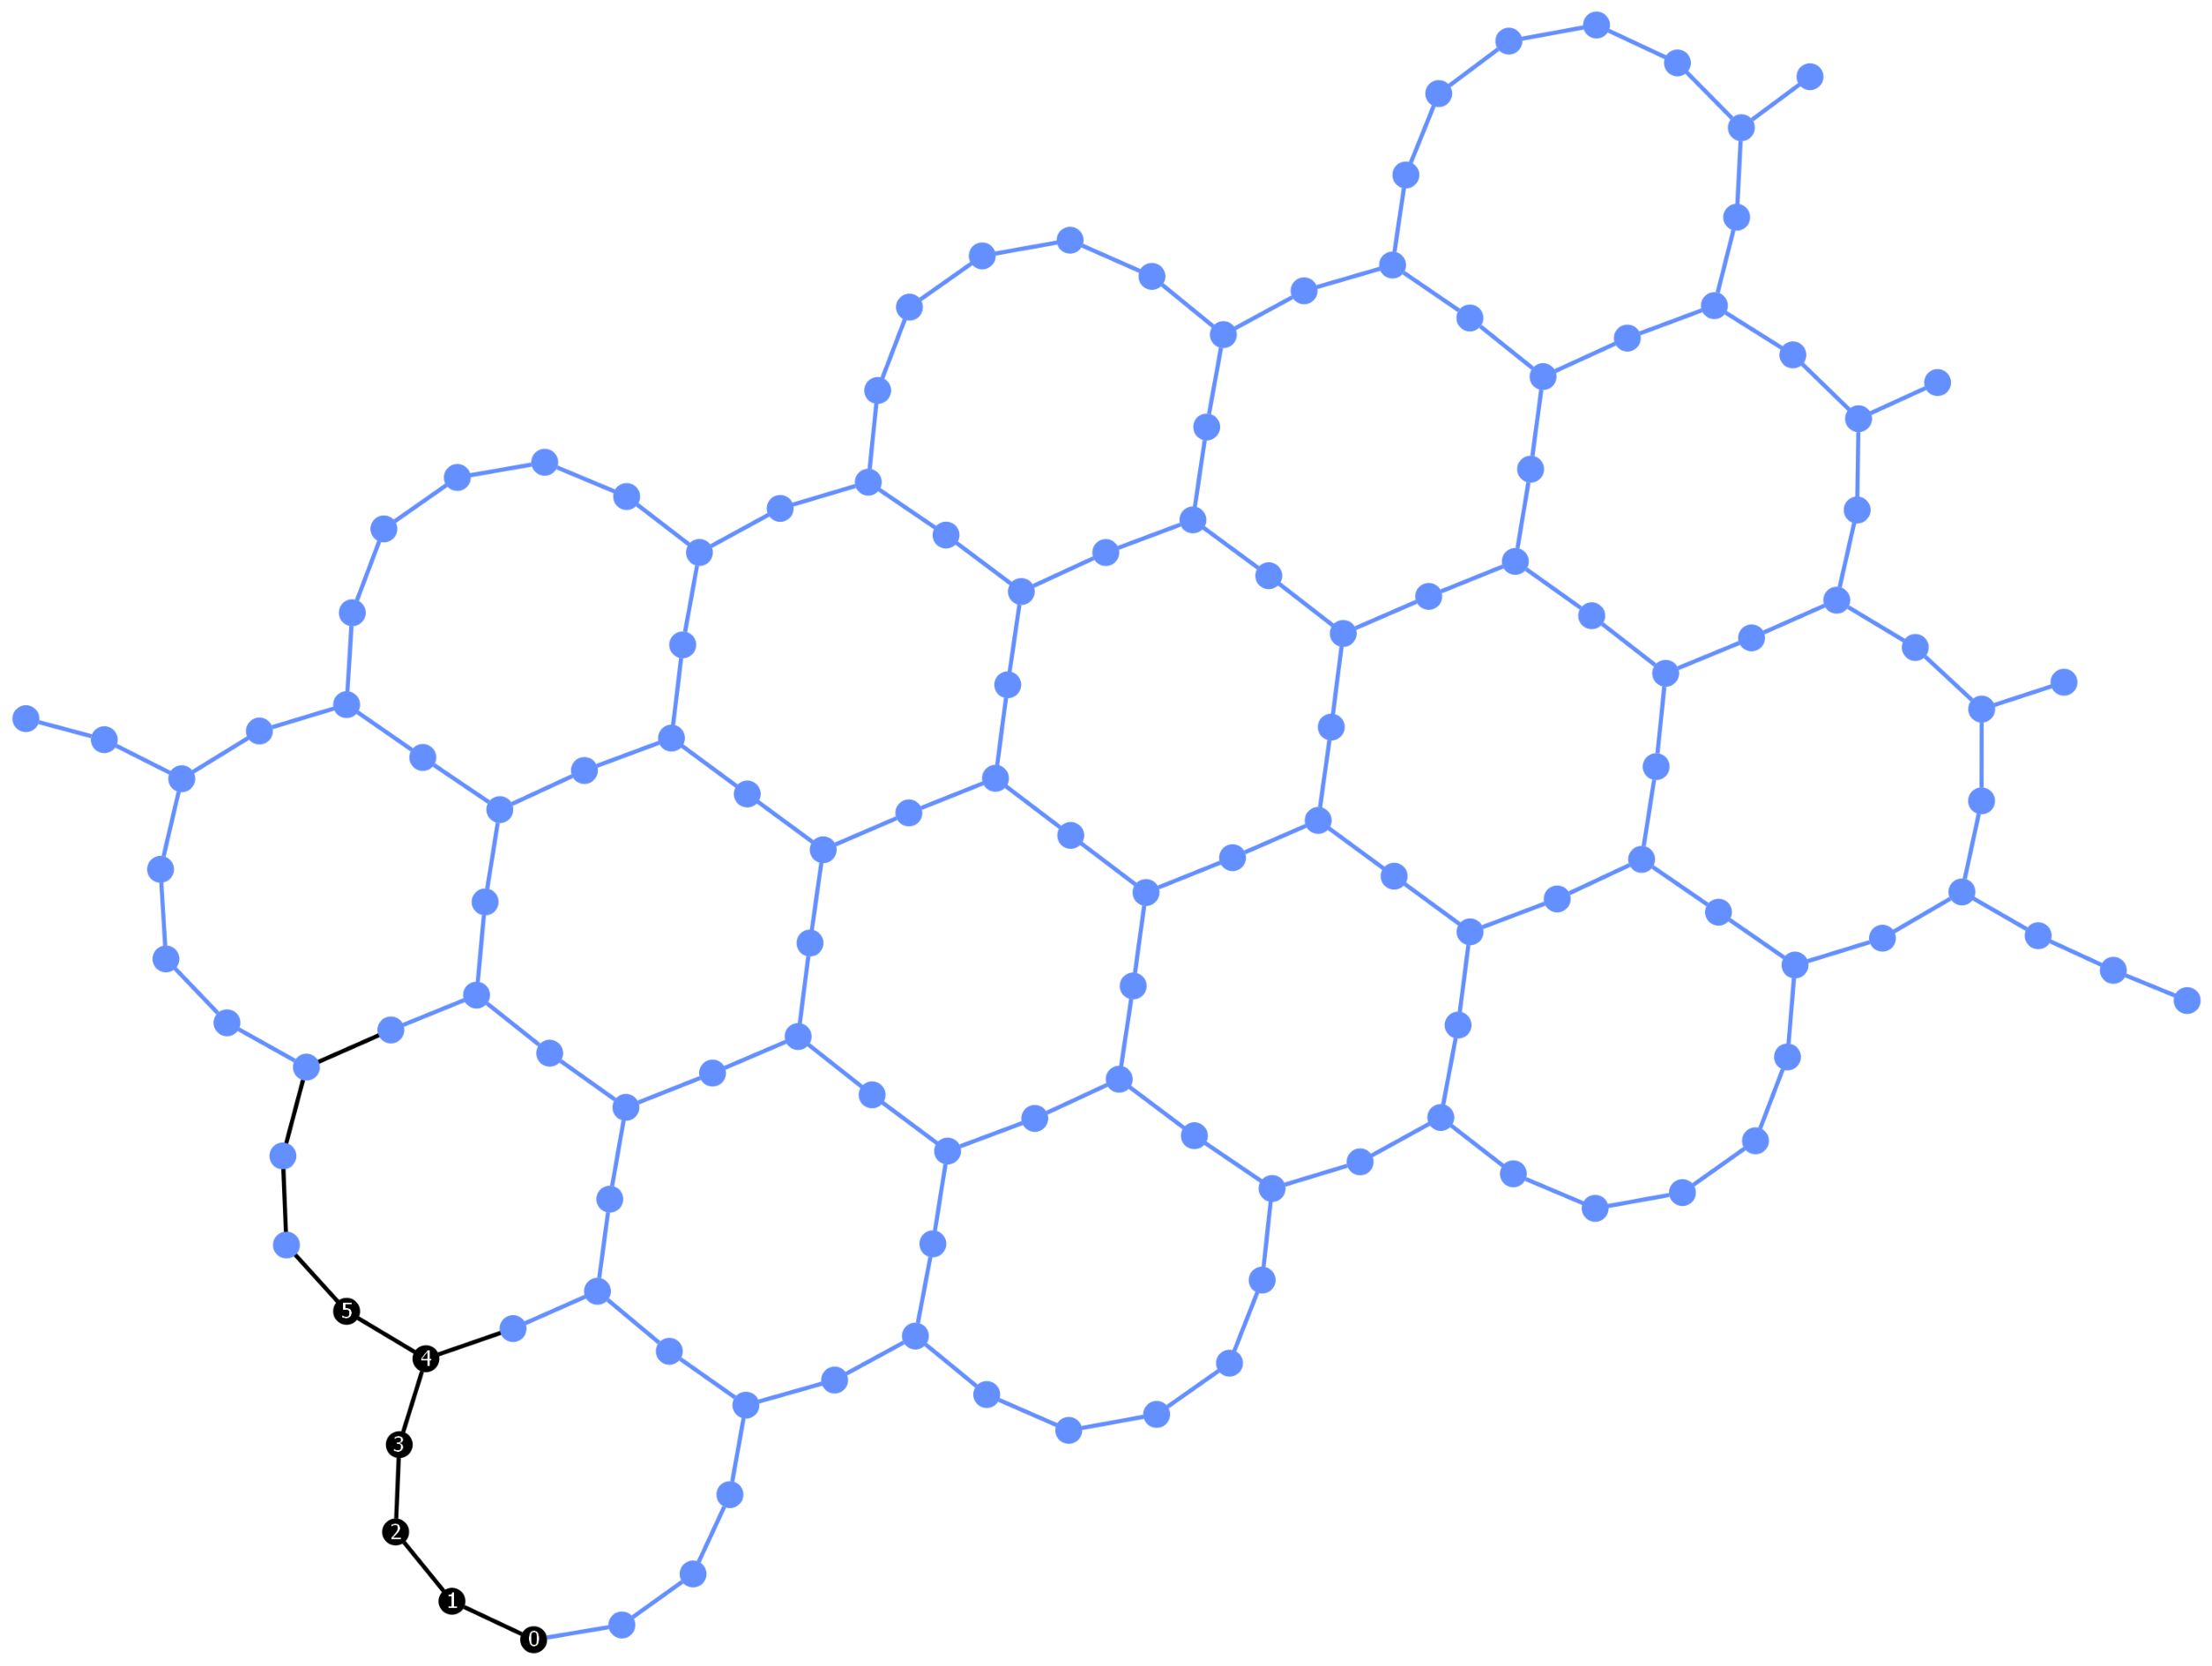


Optimization level 1:
 -  TrivialLayout
 -  CheckMap
 -  VF2Layout
 -  BarrierBeforeFinalMeasurements
 -  SabreLayout
 -  FlowControllerLinear
[85, 84, 83, 93, 73, 82]


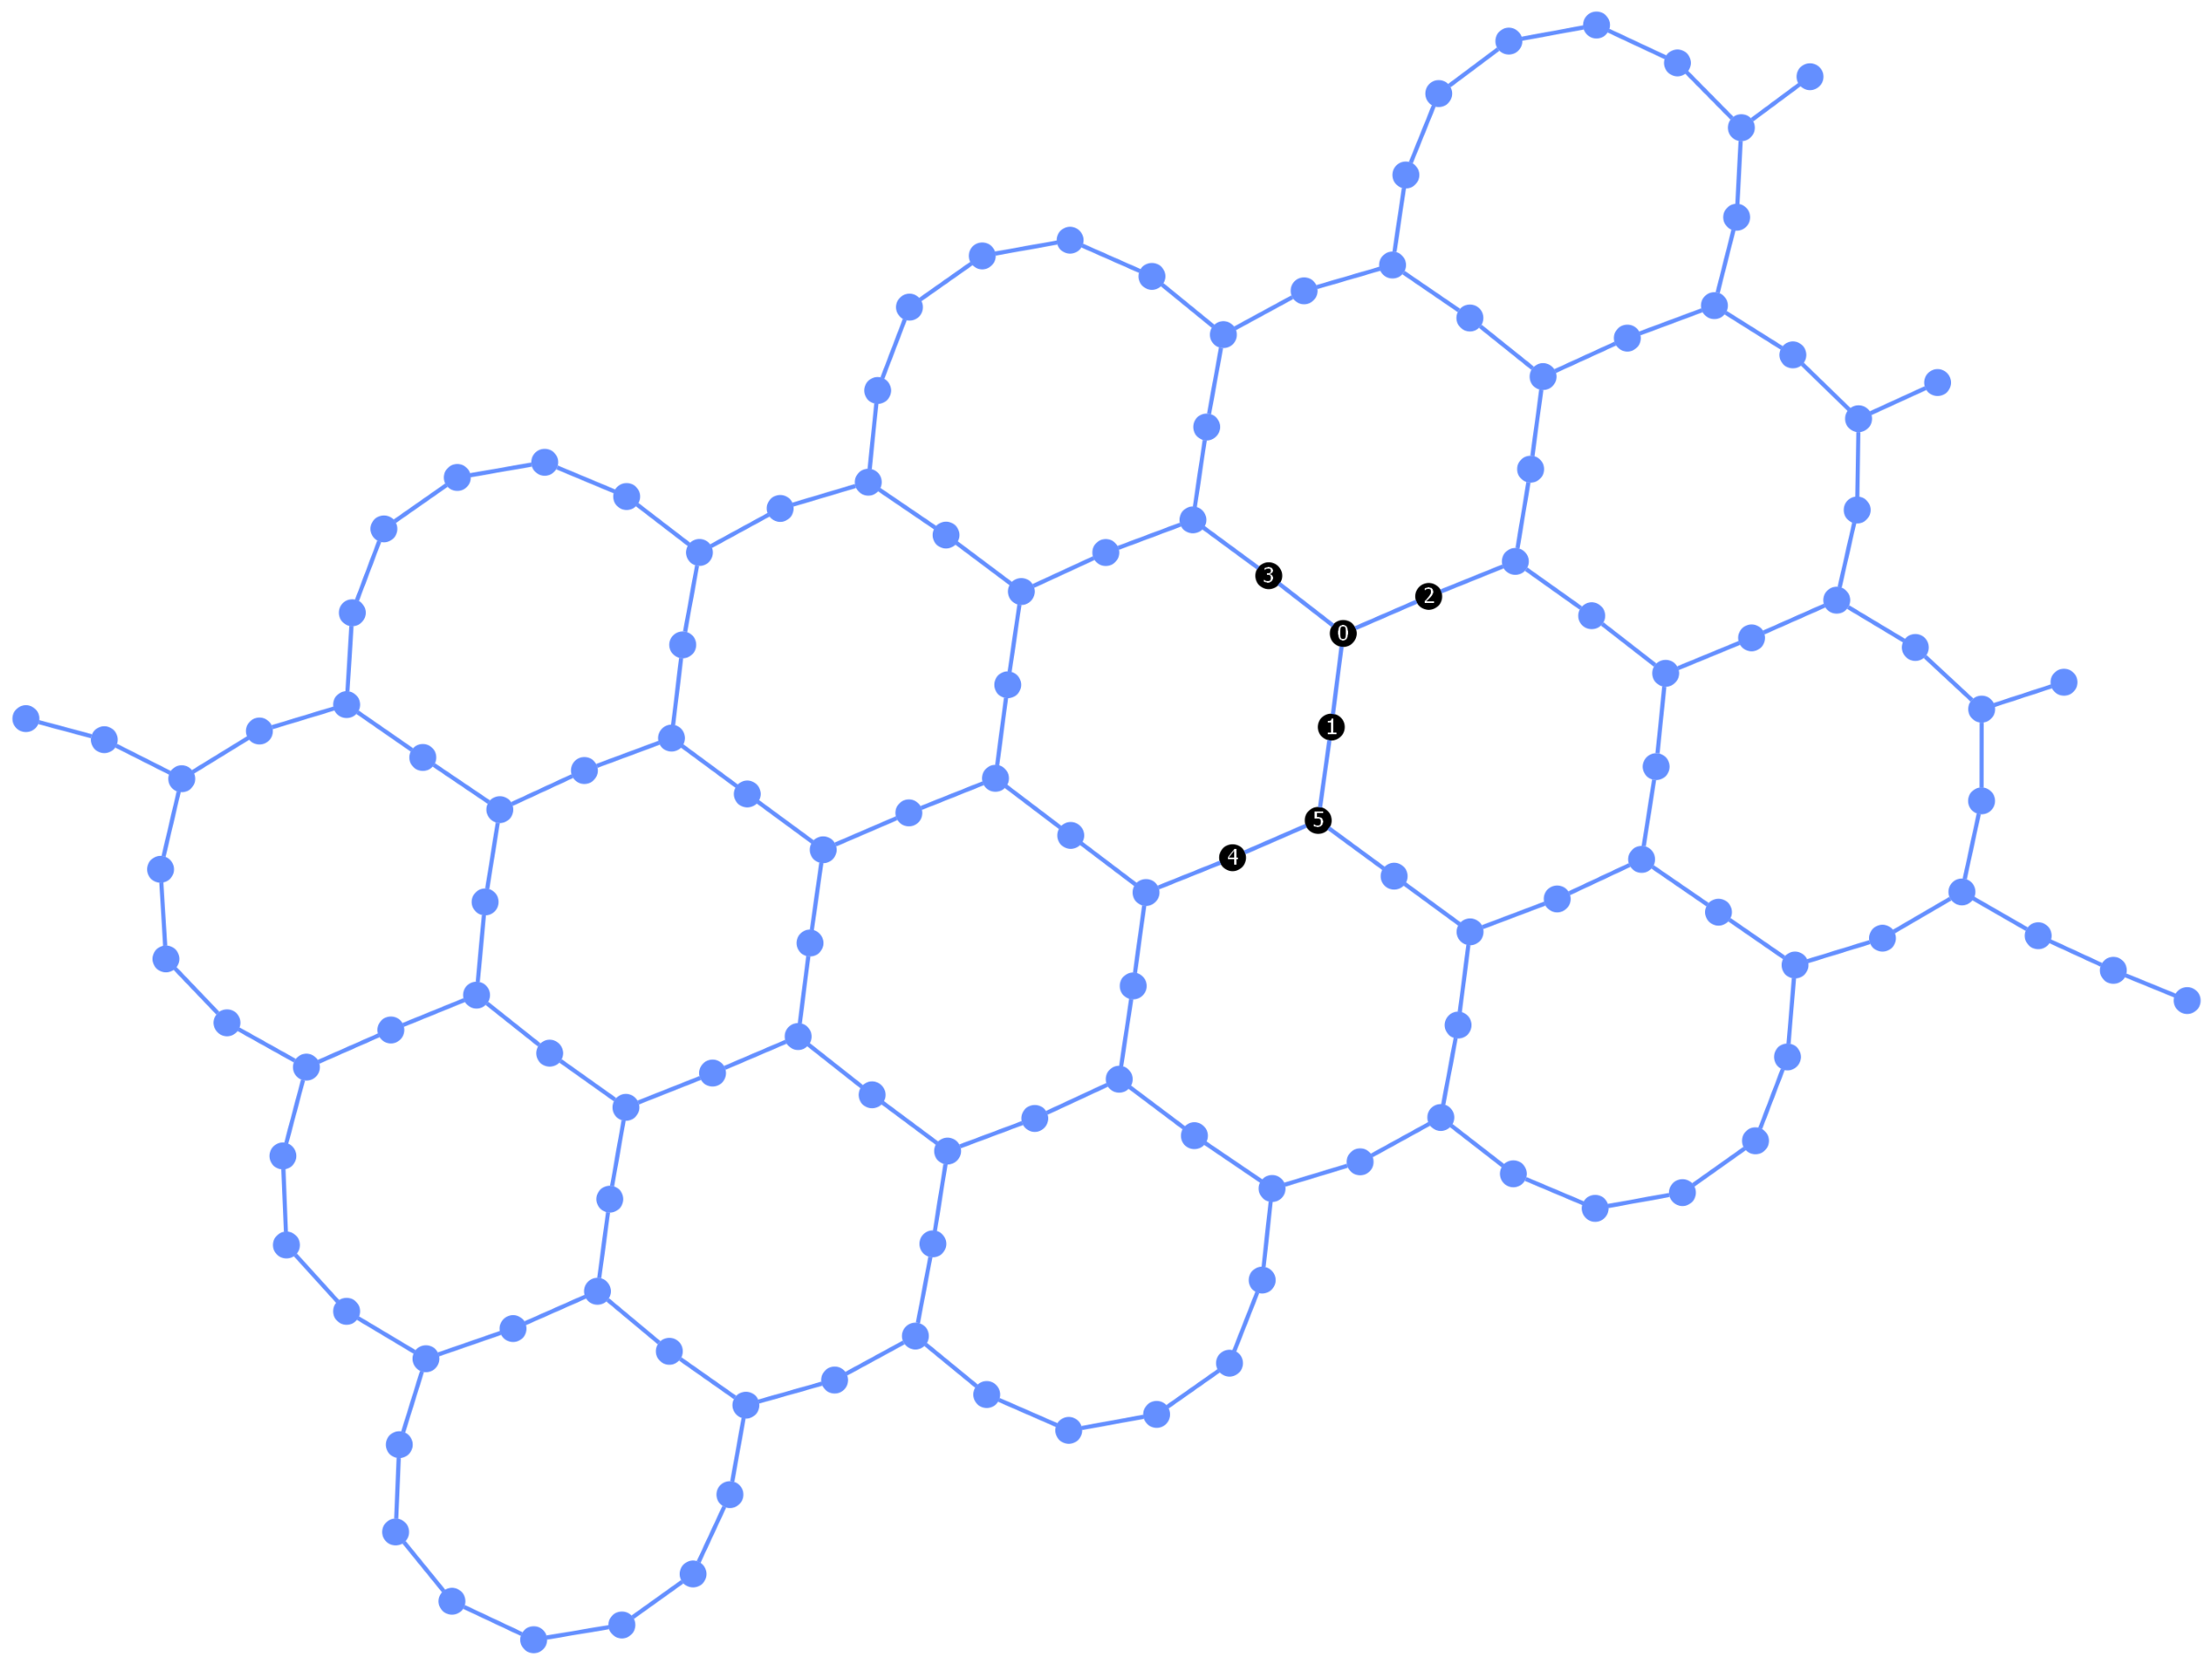


Optimization level 2:
 -  VF2Layout
 -  BarrierBeforeFinalMeasurements
 -  SabreLayout
 -  FlowControllerLinear
[85, 84, 83, 93, 73, 82]


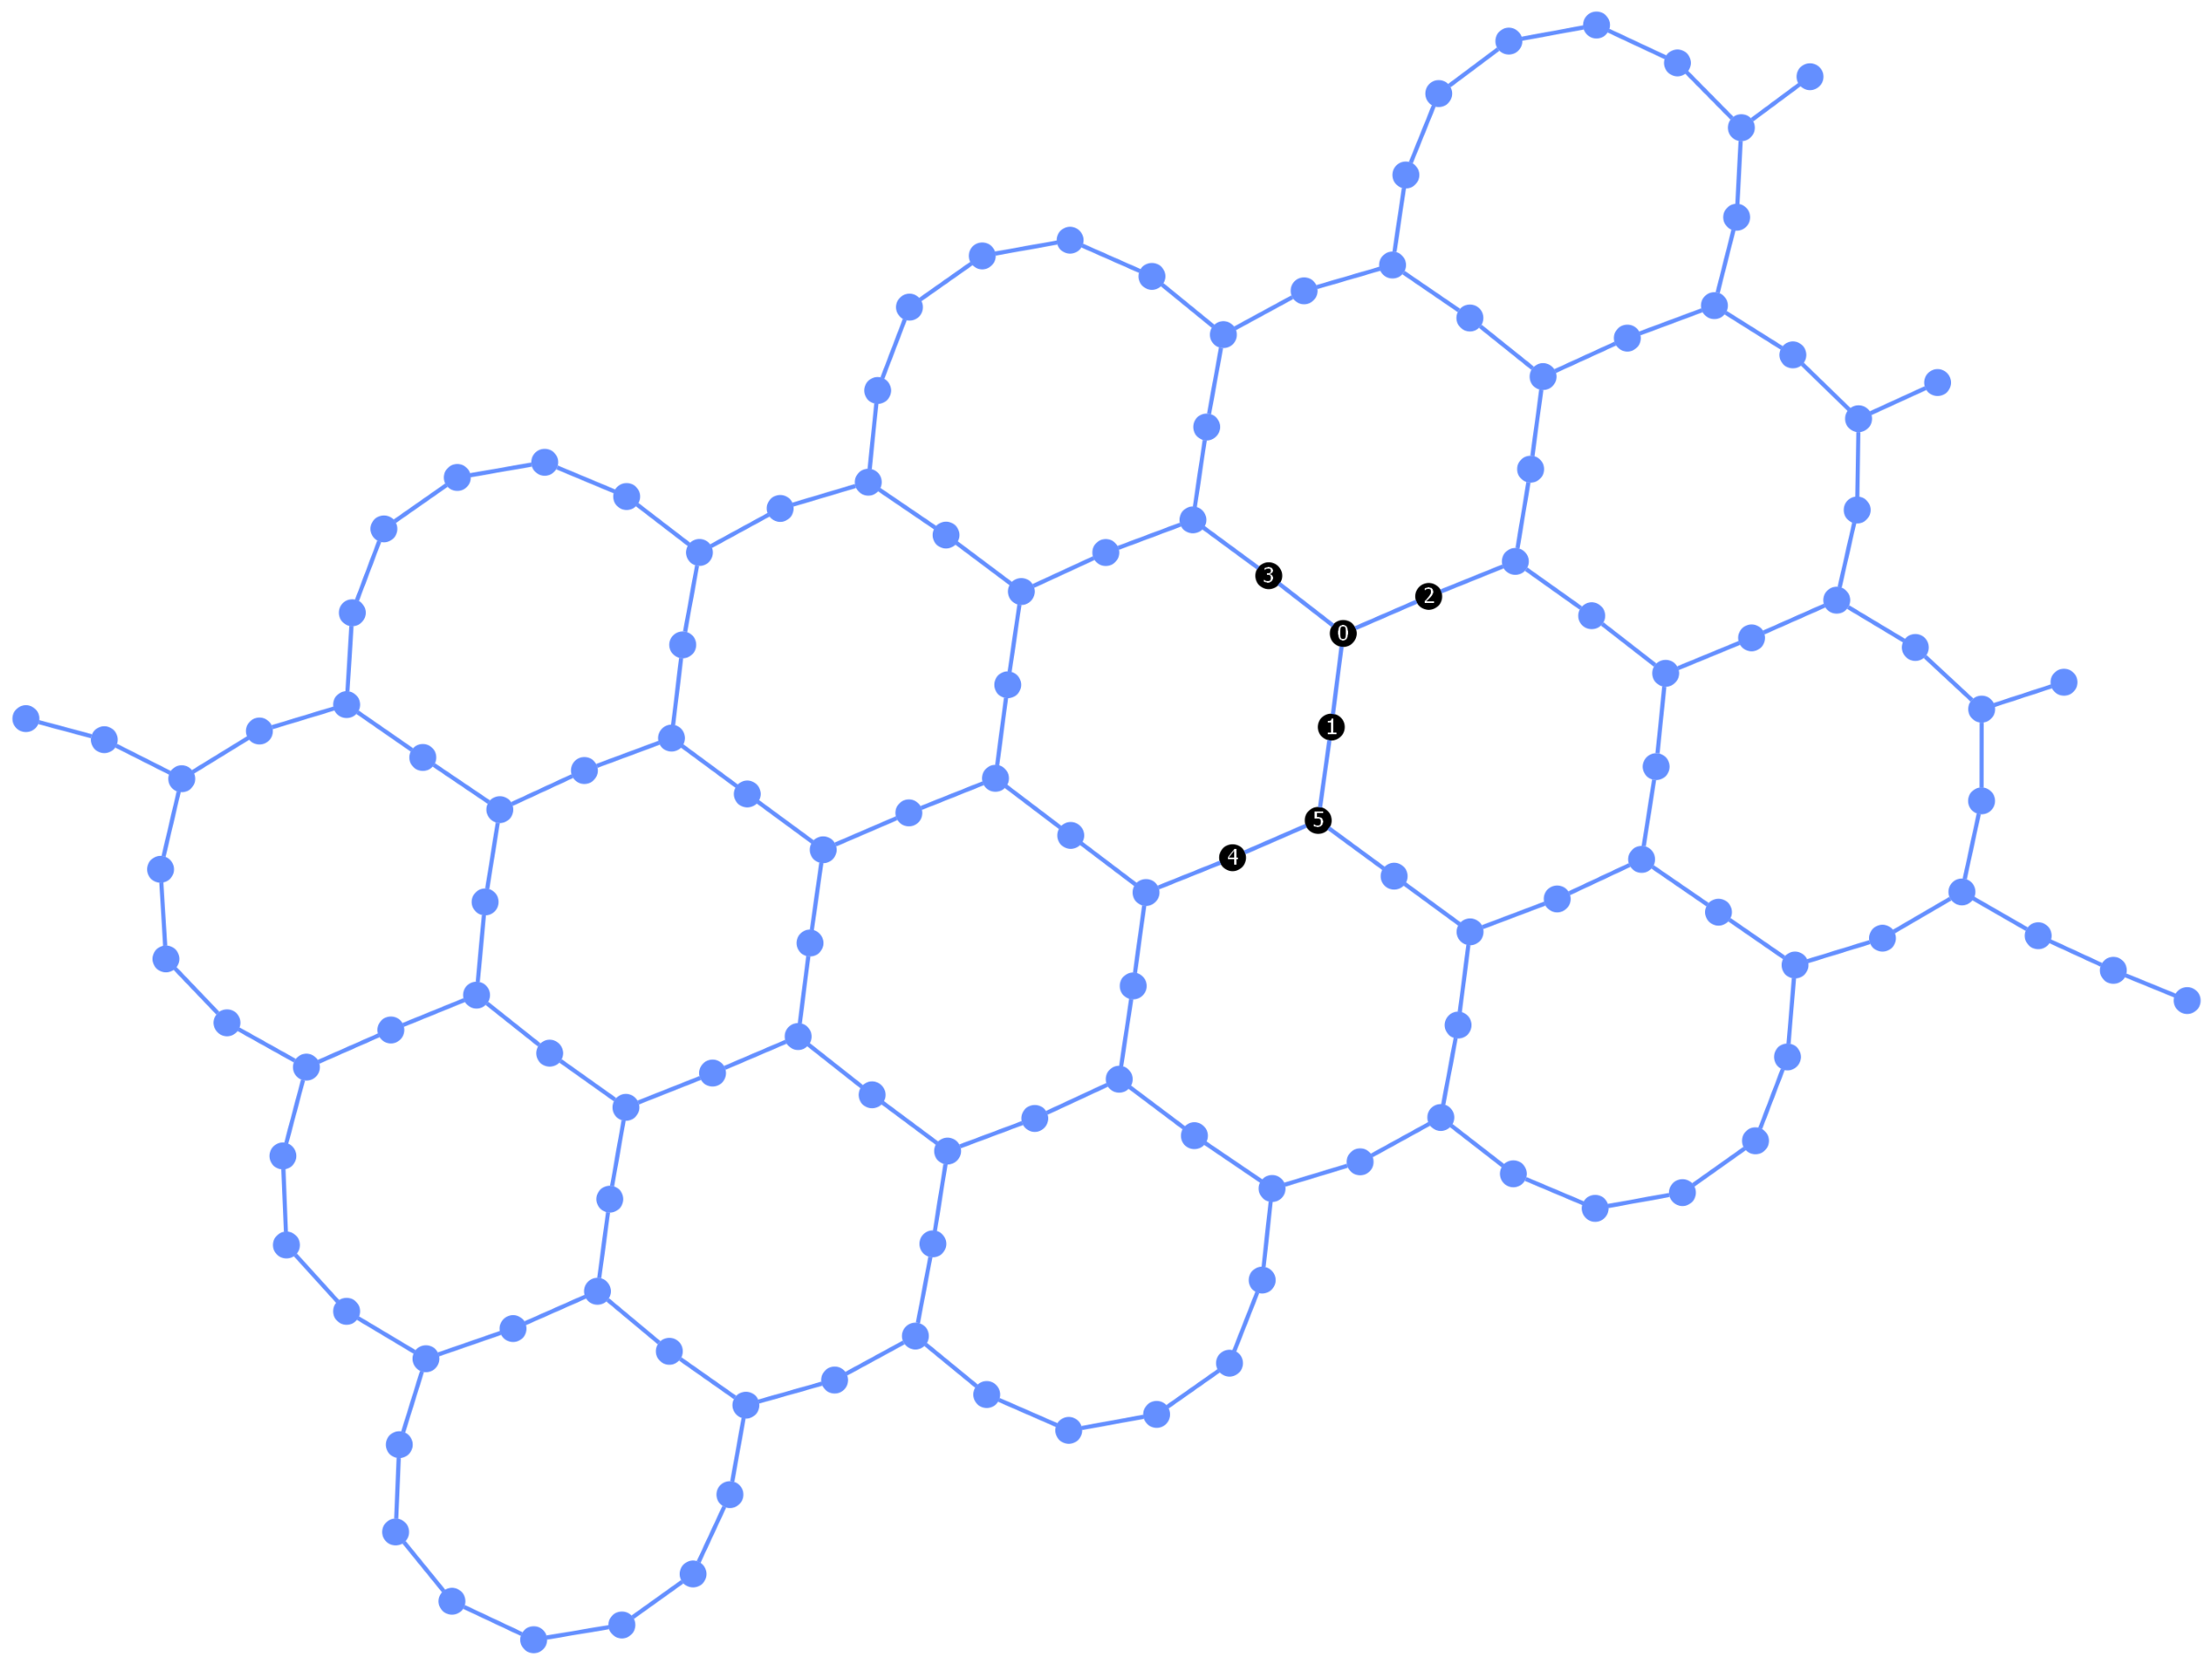


Optimization level 3:
 -  VF2Layout
 -  BarrierBeforeFinalMeasurements
 -  SabreLayout
 -  FlowControllerLinear
[85, 84, 83, 93, 73, 82]


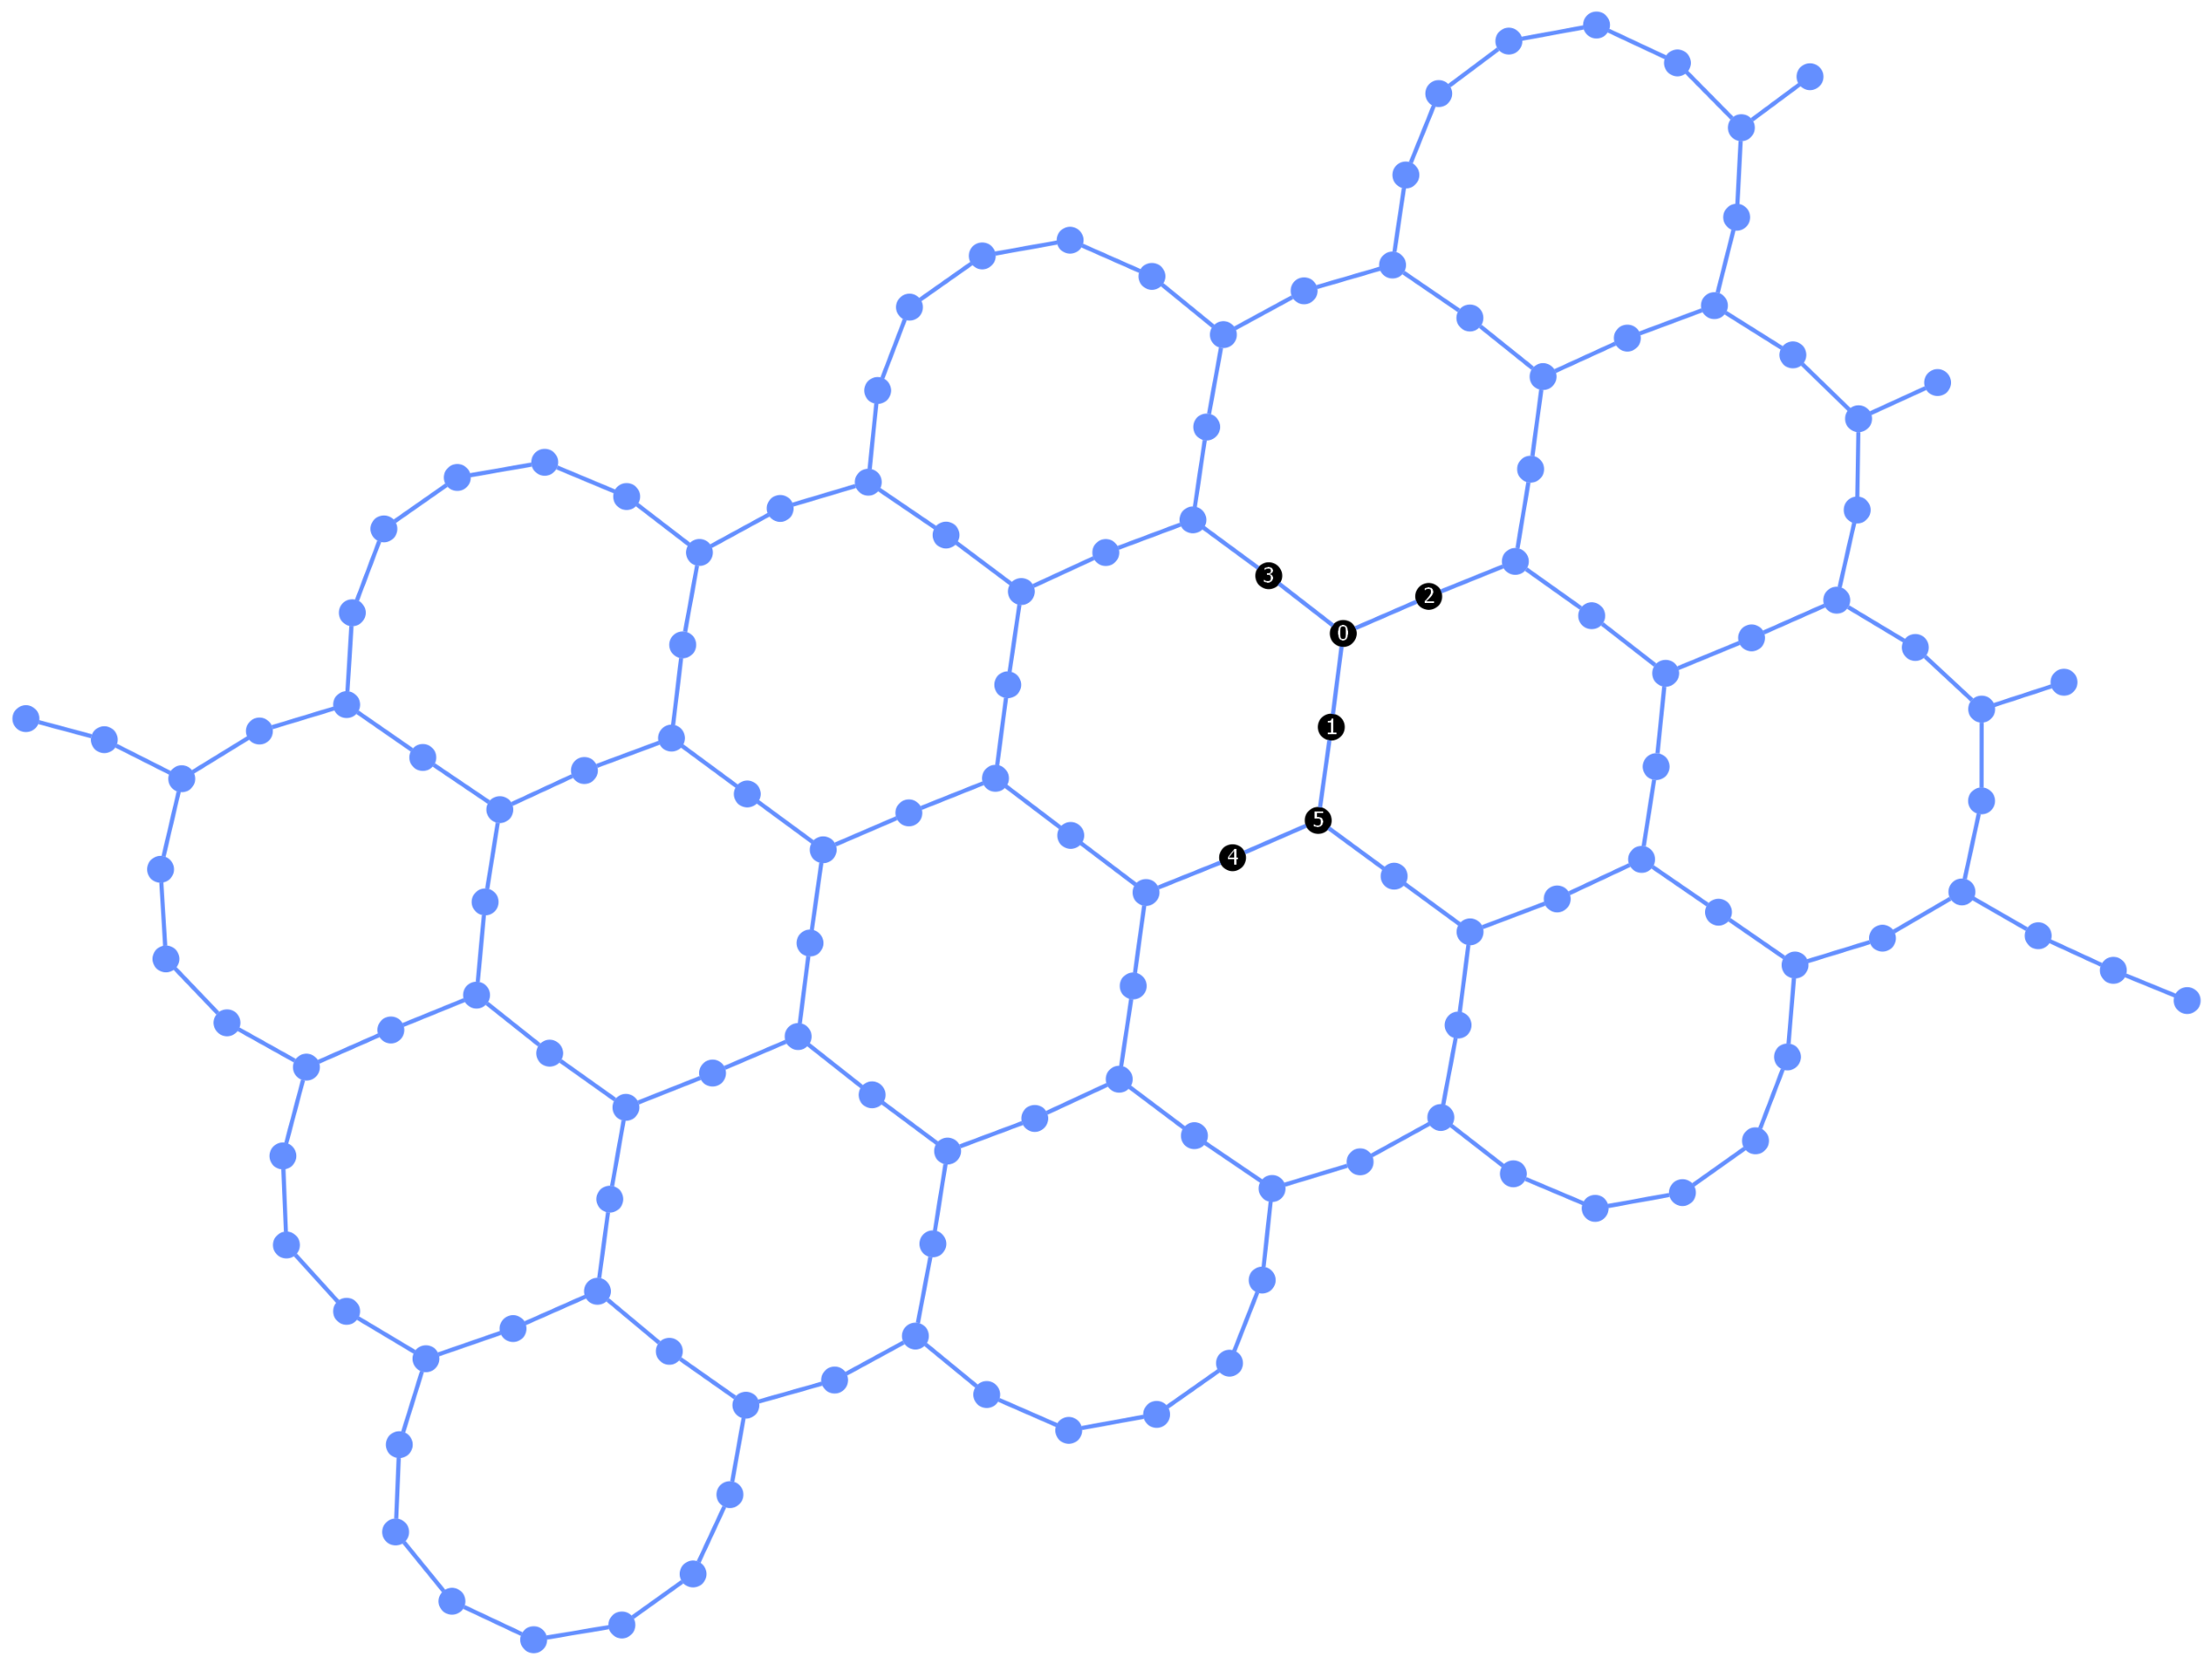

In [21]:
print("Plugins run by default layout stage")
print("=================================")
for i in range(4):
    print(f"\nOptimization level {i}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=i, layout_method='default', seed_transpiler=seed)
    qc_tr = pm.run(qc)

    for controller_group in pm.layout.to_flow_controller().tasks:
        tasks = getattr(controller_group, "tasks", [])
        for task in tasks:
            print(" - " , str(type(task).__name__))
    print(qc_tr.layout.final_index_layout())
    display(plot_circuit_layout(pm.run(qc), backend))

In [22]:
for option in list_stage_plugins("layout"):
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3, layout_method=option, seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)

    print(f"Layout method = {option}")
    print(f"Score: {score:.6f}")
    print(f"Layout: {qc_tr.layout.final_index_layout()}\n")

Layout method = default
Score: 0.277188
Layout: [85, 84, 83, 93, 73, 82]

Layout method = dense
Score: 0.188764
Layout: [37, 52, 51, 49, 56, 50]

Layout method = sabre
Score: 0.277188
Layout: [85, 84, 83, 93, 73, 82]

Layout method = trivial
Score: 0.334350
Layout: [0, 1, 2, 4, 5, 3]



In [23]:
list_stage_plugins("routing")

['basic', 'lookahead', 'none', 'sabre', 'stochastic']

In [24]:
print("Number of each gates of transpiled circuit and the score")
print("=================================")
for i in range(4):
    print(f"\nOptimization level {i}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=i, routing_method='basic', seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)
    for key, value in qc_tr.count_ops().items():
        print(key, ":", value)
    print(f"Score: {score:.6f}")

Number of each gates of transpiled circuit and the score

Optimization level 0:


rz : 406
sx : 192
cz : 81
x : 1
Score: 0.443191

Optimization level 1:
rz : 167
sx : 95
cz : 48
Score: 0.133092

Optimization level 2:
sx : 95
rz : 90
cz : 48
Score: 0.133092

Optimization level 3:
sx : 90
rz : 81
cz : 42
x : 1
Score: 0.120879


In [25]:
print("Plugins run by basic routing stage")
print("=================================")
for i in range(4):
    print(f"\nOptimization level {i}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=i, routing_method='basic', seed_transpiler=seed)

    for controller_group in pm.routing.to_flow_controller().tasks:
        tasks = getattr(controller_group, "tasks", [])
        for task in tasks:
            print(" - " , str(type(task).__name__))
    print(pm.run(qc).layout.final_index_layout())

Plugins run by basic routing stage

Optimization level 0:
 -  BarrierBeforeFinalMeasurements
 -  BasicSwap
[4, 1, 2, 0, 5, 3]

Optimization level 1:
 -  BarrierBeforeFinalMeasurements
 -  BasicSwap
 -  VF2PostLayout
 -  ApplyLayout
[99, 110, 97, 96, 92, 98]

Optimization level 2:
 -  BarrierBeforeFinalMeasurements
 -  BasicSwap
 -  VF2PostLayout
 -  ApplyLayout
[99, 110, 97, 96, 92, 98]

Optimization level 3:
 -  BarrierBeforeFinalMeasurements
 -  BasicSwap
 -  VF2PostLayout
 -  ApplyLayout
[99, 110, 97, 96, 92, 98]


In [26]:
## process stopped due to lookahead
options = ['basic','sabre', 'stochastic']

for option in options:
    print(f"Layout option = {option}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3, routing_method=option, seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)

    print(f"Score: {score:.6f}")

    for key, value in qc_tr.count_ops().items():
        print(key, ":", value)
    print("\n")

Layout option = basic:
Score: 0.120879
sx : 90
rz : 81
cz : 42
x : 1


Layout option = sabre:
Score: 0.096379
sx : 75
rz : 66
cz : 37
x : 1


Layout option = stochastic:
Score: 0.169412
sx : 136
rz : 111
cz : 66
x : 1




In [27]:
list_stage_plugins("translation")

['synthesis',
 'translator',
 'ibm_backend',
 'ibm_dynamic_circuits',
 'ibm_backend',
 'ibm_dynamic_circuits']

In [28]:
print("Number of each gates of transpiled circuit")
print("=================================")

for i in range(4):
    print(f"\nOptimization level {i}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=i, translation_method='translator', seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)
    for key, value in qc_tr.count_ops().items():
        print(key, ":", value)
    print(f"Score: {score:.6f}")

Number of each gates of transpiled circuit

Optimization level 0:
rz : 394
sx : 186
cz : 78
x : 1
Score: 0.378009

Optimization level 1:
rz : 131
sx : 77
cz : 39
Score: 0.100534

Optimization level 2:
sx : 77
rz : 71
cz : 39
Score: 0.100534

Optimization level 3:
sx : 75
rz : 66
cz : 37
x : 1
Score: 0.096379


In [29]:
options = ['translator', 'synthesis']

print("Number of each gates of transpiled circuit")
print("=================================")

for option in options:
    print(f"Layout option = {option}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3, translation_method=option, seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)
    for key, value in qc_tr.count_ops().items():
        print(key, ":", value)
    print(f"Score: {score:.6f}")
    print("\n")

Number of each gates of transpiled circuit
Layout option = translator:
sx : 75
rz : 66
cz : 37
x : 1
Score: 0.096379


Layout option = synthesis:
sx : 74
rz : 71
cz : 37
x : 10
Score: 0.099099




In [30]:
tr_depths = []
tr_gate_counts = []
tr_scores = []

options = ['translator', 'synthesis']

for i in range(4):
    for option in options:
        pm = generate_preset_pass_manager(backend=backend, optimization_level=i, translation_method=option, seed_transpiler=seed)

        tr_depths.append(pm.run(qc).depth())
        tr_gate_counts.append(sum(pm.run(qc).count_ops().values()))
        tr_scores.append(scoring(pm.run(qc), backend))

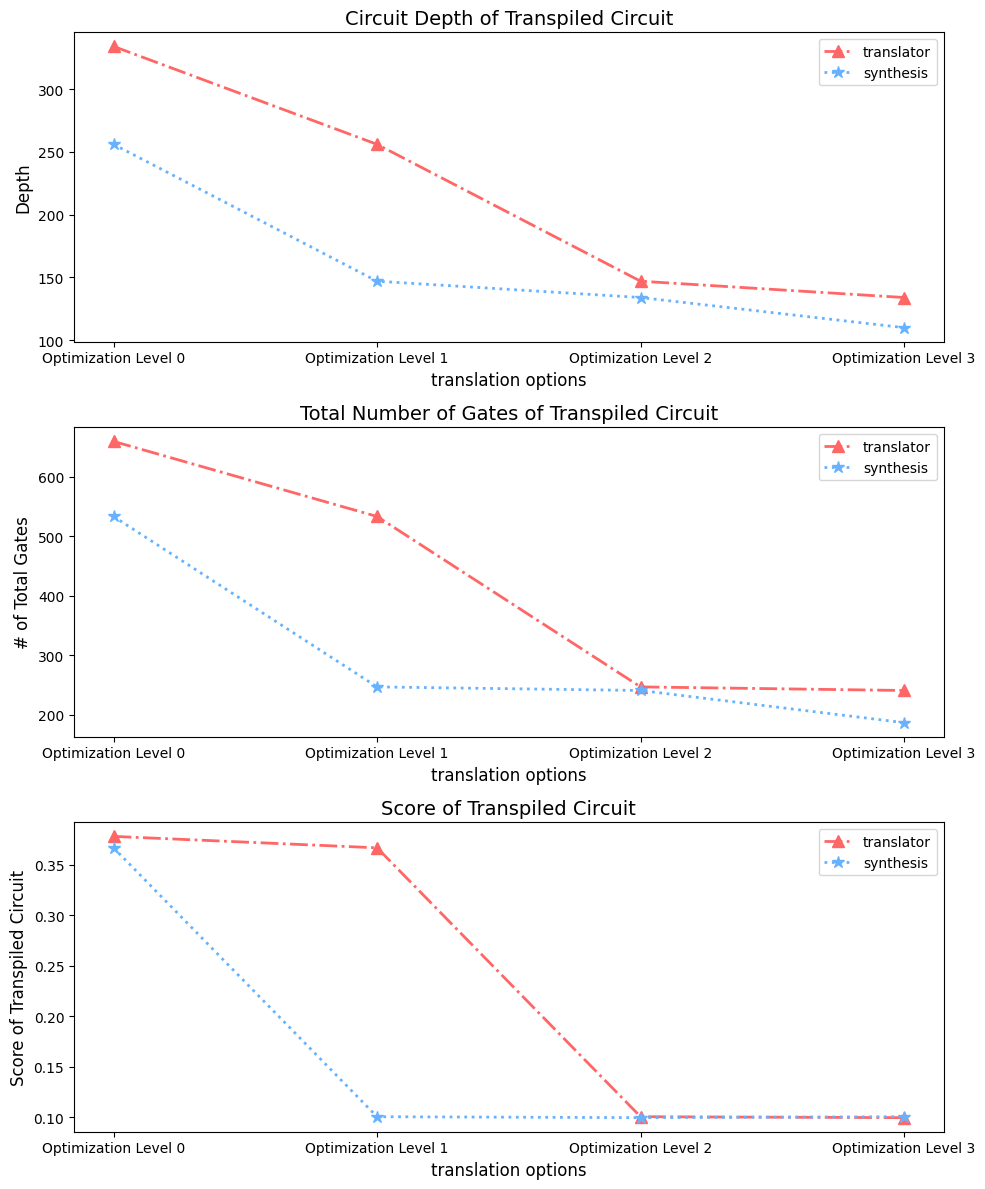

In [31]:
colors = ['#FF6666', '#66B2FF']
markers = [ '^', '*']
linestyles = ['-.', ':']

opt_list = []
for i in range(4):
    opt_list.append(f"Optimization Level {i}")

ax = opt_list
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot 1: Circuit Depth
for i in range(2):
    ax1.plot(ax, tr_depths[i:i+4], label=options[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax1.set_xlabel("translation options", fontsize=12)
ax1.set_ylabel("Depth", fontsize=12)
ax1.set_title("Circuit Depth of Transpiled Circuit", fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Total Number of Gates
for i in range(2):
    ax2.plot(ax, tr_gate_counts[i:i+4], label=options[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax2.set_xlabel("translation options", fontsize=12)
ax2.set_ylabel("# of Total Gates", fontsize=12)
ax2.set_title("Total Number of Gates of Transpiled Circuit", fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Score of Transpiled Circuit
for i in range(2):
    ax3.plot(ax, tr_scores[i:i+4], label=options[i], marker=markers[i],markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax3.set_xlabel("translation options", fontsize=12)
ax3.set_ylabel("Score of Transpiled Circuit", fontsize=12)
ax3.set_title("Score of Transpiled Circuit", fontsize=14)
ax3.legend(fontsize=10)

fig.tight_layout()
plt.show()

In [32]:
list_stage_plugins("scheduling")

['alap', 'asap', 'default']

In [33]:
backend_timing = backend.target.timing_constraints()
timing_constraints = TimingConstraints(
    granularity=backend_timing.granularity,
    min_length=backend_timing.min_length,
    pulse_alignment=backend_timing.pulse_alignment,
    acquire_alignment=backend_timing.acquire_alignment )

In [34]:
# Run with optimization level 3 and 'asap' scheduling pass
pm_asap = generate_preset_pass_manager(
    optimization_level=3,
    backend=backend,
    timing_constraints=timing_constraints,
    scheduling_method="asap",
    seed_transpiler=seed,
)

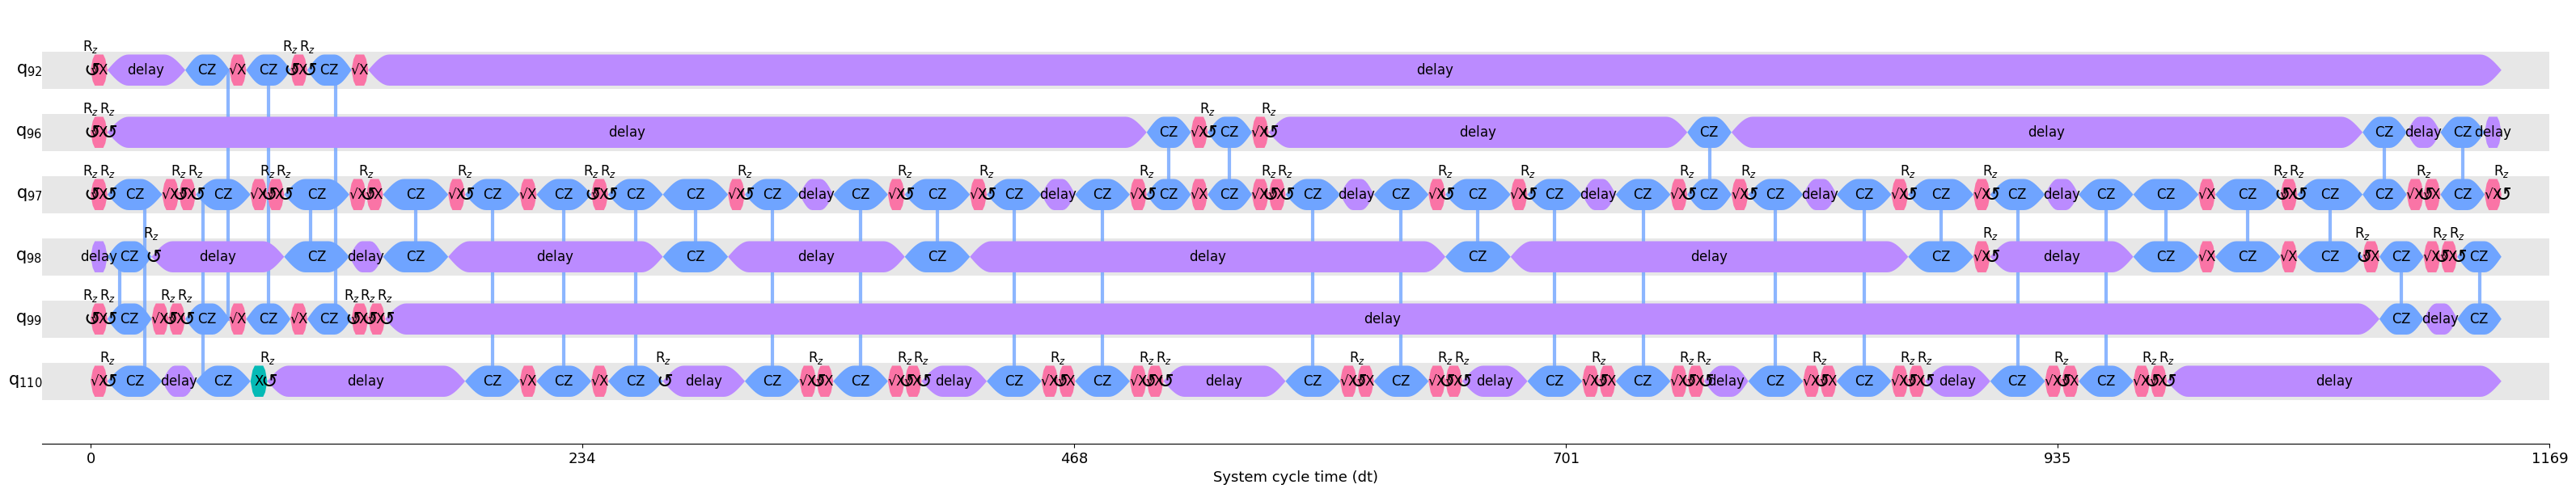

In [35]:
my_style = {
    'formatter.general.fig_width': 40,
    'formatter.general.fig_unit_height': 1,
}

draw(pm_asap.run(qc), style=IQXStandard(**my_style), show_idle=False, show_delays=True)

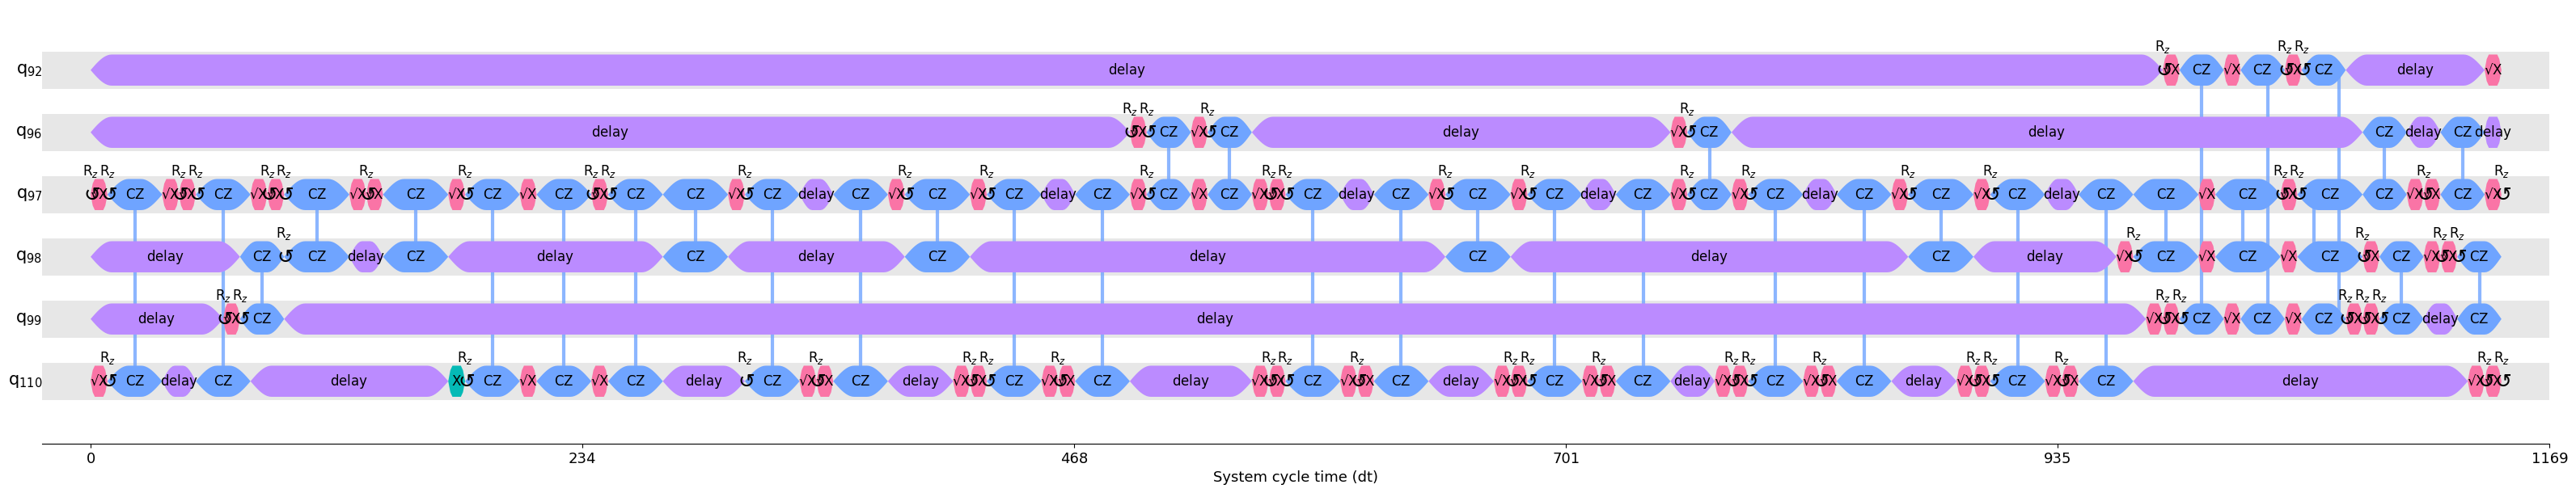

In [36]:
pm_alap = generate_preset_pass_manager(
    optimization_level=3,
    backend=backend,
    timing_constraints=timing_constraints,
    scheduling_method="alap",
    seed_transpiler=seed,
)
draw(pm_alap.run(qc), style=IQXStandard(**my_style), show_idle=False, show_delays=True)

In [37]:
print("Score")
print("===============")
print(f"asap: {scoring(pm_asap.run(qc), backend):.6f}")
print(f"alap: {scoring(pm_alap.run(qc), backend):.6f}")

Score
asap: 0.212772
alap: 0.177097


<div class="alert alert-block alert-success">
<a id='ex4'></a>
<a name='ex4'></a>

### Exercise 4:

**Your Task:** At this point, you should feel like a professional at constructing different pass managers. Please make a pass manager with the following options:

1. optimization level = 3
2. "sabre" layout
3. "sabre" routing
4. "synthesis" translation
   
</div>

In [38]:
pm_ex4 = generate_preset_pass_manager(
    backend=backend,

    ### Write your code below here ###
    optimization_level=3,
    initial_layout=None,
    layout_method='sabre',
    routing_method='sabre',
    translation_method='synthesis'


    ### Don't change any code past this line ###
)

# Build your own pass managers with staged pass manager <a name='staged_pm'></a>

One of the powerful features of the Qiskit v1.0 transpiler is its flexibility. It allows you compose a `PassManager` with only two or three stages. It also allows you to put your own `Pass` at desired stages.

In [39]:
X = XGate()
Y = YGate()

dd_sequence = [X, Y, X, Y]

In [40]:
backend=FakeTorino()

target = backend.target

y_gate_properties = {}
for qubit in range(target.num_qubits):
    y_gate_properties.update(
        {
            (qubit,): InstructionProperties(
                duration=target["x"][(qubit,)].duration,
                error=target["x"][(qubit,)].error,
            )
        }
    )

target.add_instruction(YGate(), y_gate_properties)

<div class="alert alert-block alert-success">
<a id='ex5'></a>
<a name='ex5'></a>

### Exercise 5:

**Your Task:** Instantiate the PassManager with `ASAPScheduleAnalysis`s and `PadDynamicalDecoupling`. Run `ASAPScheduleAnalysis` first to add timing information about the quantum circuit before the regularly-spaced dynamical decoupling sequences can be added. These passes are run on the circuit with .run().
</div>

In [41]:
dd_pm = PassManager(
    [
        ## your code here
        ASAPScheduleAnalysis(),
        ## your code here
        PadDynamicalDecoupling(dd_sequence=dd_sequence)
    ]
)

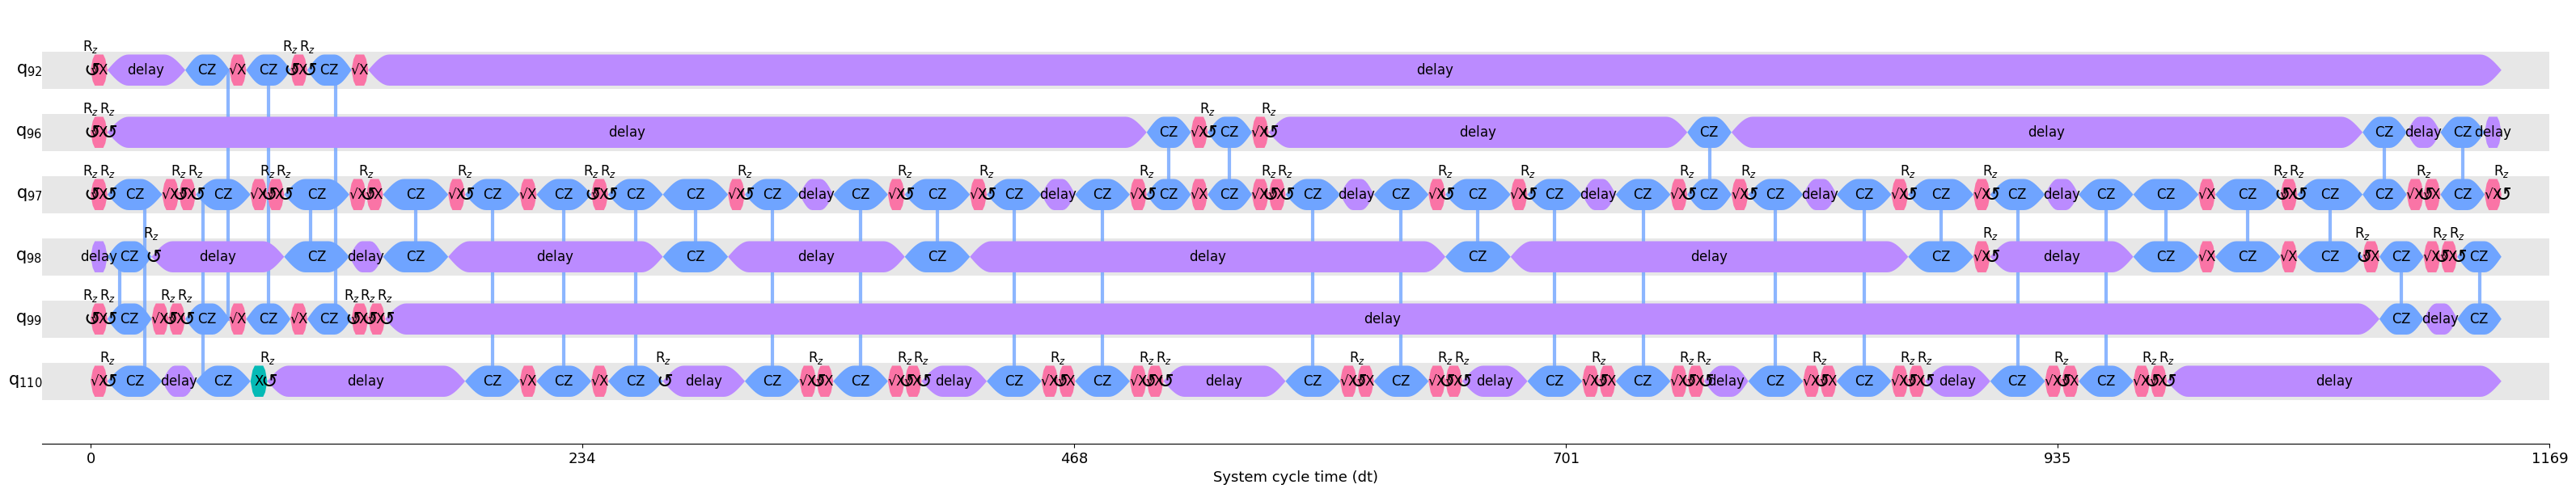

In [42]:
draw(pm_asap.run(qc), style=IQXStandard(**my_style), show_idle=False, show_delays=True)

In [43]:
staged_pm_dd = StagedPassManager(
    stages=["scheduling"],
    scheduling=dd_pm
)

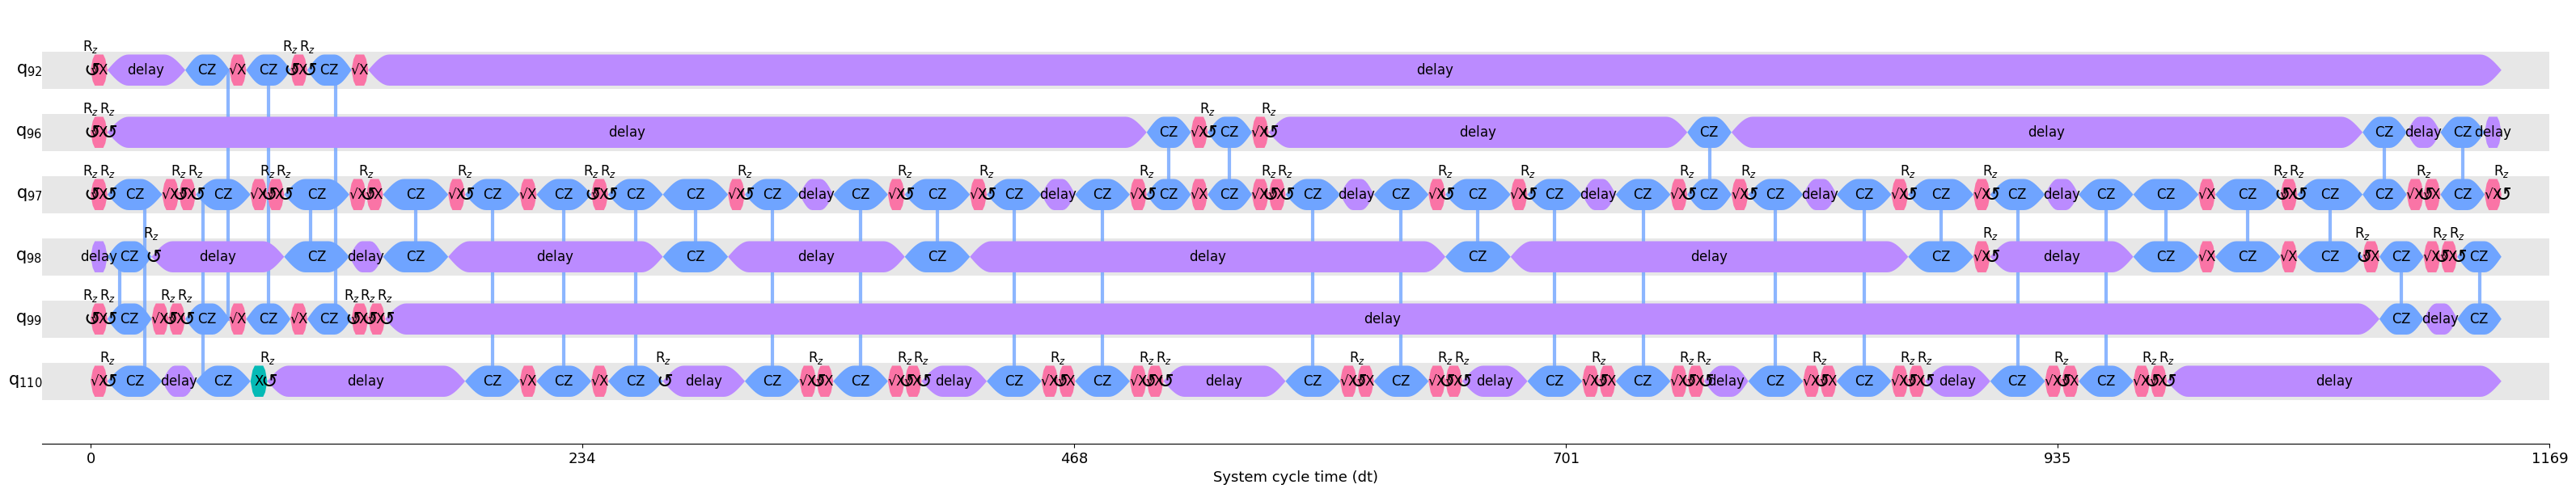

In [44]:
qc_tr = pm_asap.run(qc)
draw(pm_asap.run(qc_tr), style=IQXStandard(**my_style), show_idle=False, show_delays=True)